In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from sklearn.model_selection import cross_validate

# encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import category_encoders as ce

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# cross validation
from sklearn.model_selection import cross_val_score

# algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


import shap

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")  


---
# **Description**

Bank Marketing Campaign
Context
The types of financial products used by the public are more varied. One financial product that is well-known to the public is term deposits. The term deposit mechanism is that a customer deposits a sum of money at a bank or a financial institution, and the money can only be withdrawn after a certain period of time. As compensation, customers will be given a fixed interest according to the nominal amount of money deposited.
<br>
Nevertheless, as business entities with financial products and respective customers, banks still have to compete to not lose customers. One of the ways to acquire new customers is by conducting a marketing campaign.
Features
<br>
Customer profile

1. age
2. job
3. balance
4. housing
5.loan
<br>

Marketing data

1. contact: Contact communication type.
2. month: Last contact month of the year.
3. campaign: Number of contacts performed during this campaign and for this client.
4. pdays: Number of days after the client was contacted from the previous campaign.
5. poutcome: Outcome of the previous marketing campaign.
6. deposit: Whether the customer deposits or not.

Time deposits have internal functions for banks, namely: 
- Meeting bank capital needs
- Maintaining bank liquidity. 

Time deposits are one of the main sources of bank capital that are easy to utilize. Banks need working capital that is always met because the bank's function is to channel money from the public in the form of credit. 

Time deposits also have an external function, namely facilitating the flow of money payments. 
Time deposits are banking products that allow customers to deposit money within a certain period of time. Customers cannot withdraw money before the specified period, for example 1 year, 5 years, or 10 years.

Sources : 
1. https://www.investopedia.com/terms/t/termdeposit.asp#:~:text=A%20term%20deposit%20is%20a%20type%20of%20deposit%20account%20held,month%20to%20a%20few%20years
2. https://siplawfirm.id/deposito-berjangka/?lang=id#:~:text=Fungsi%20internal%2C%20deposito%20dapat%20mendukung,tinggi%20guna%20membantu%20perekonomian%20nasional.&text=Keuntungan%20deposito%20berjangka%20adalah%20memiliki,Dapat%20dijadikan%20investasi
3. 


---
# **Bussiness Problem**


Business Problem: The bank needs to predict effectively and reach out to customers who are most likely to open a term deposit account via its campaign. 


This may include the characteristics of possible patterns that reflect positive responses for effective campaigns, thus optimizing marketing efforts, enhancing customer acquisition, and reducing campaign costs.

Business Objective are:

- Maximize Campaign Effectiveness by Identify and reach customers who likely to subscribe to a term deposit, tso that it will increasing the conversion rate of the campaign.
- Increased ROI

Achieve greater profitability in the campaign by focusing efforts on those high-potential customers who reduce the cost per acquisition. The precise focus ensures that the bank does not spend resources on uninterested customers, while the F1-score strikes a balance between precision and recall for effectiveness to meet the desired reach
In this classification problem the model should be able to predict whether a customer will open a term deposit-a binary outcome with "yes" or "no," categories.
1. Primary Metrics
    - Precision
        Focuses on the proportion of correctly predicted "yes" (positive) cases among all predicted positives.
        Important if the cost of targeting uninterested customers (false positives) is high.

Precision and F1-score maybe be more important in a marketing campaign context to avoid waste in marketing resources and to make as much effect with the campaign as possible. If customer retention is highly valued, recall could also be a focus.



1. Target: deposit (yes/no)
- Positive Case (P): The customer subscribes to a term deposit (deposit = yes).
- Negative Case (N): The customer does not subscribe to a term deposit (deposit = no).

2. Definitions:
- False Positive (FP):
    The model predicts that a customer will subscribe (deposit = yes), but in reality, the customer does not subscribe.
    Impact: Wastes marketing resources by targeting customers who are not likely to subscribe. This can lead to inefficiencies and increased campaign costs.
- False Negative (FN):
    The model predicts that a customer will not subscribe (deposit = no), but in reality, the customer does subscribe.
    Implication: Misses potential customers who might have subscribed, resulting in lost revenue opportunities for the bank.

---
# **The method**

The steps applied in this project will include but are not limited to these highlighted below.

1. Understanding the Data
    - Review data structure, features, and target variable.
    - Target: deposit (binary: "yes" or "no").
    - Features that will be included for this customer profile data - age, job, balance, housing, loan - and marketing campaign data - contact, month, campaign, pdays, poutcome.
2. EDA 
    - Missing Values Treatment: detect and decide on filling the NaNs with mean/median values or deleting rows containing them.
    - Visualize data in order to understand distributions and relationships among basic characteristics of the data. Observe class imbalance: number of "yes" versus "no" in deposit.
    - Check the correlation between features.
    - Identify outliers or unusual patterns.

3. Data Preparation
    - Categorical Variable Encoding: Perform label encoding for binary variables: housing, loan, deposit;.
    - Use one-hot encoding for multi-class categorical variables: job, contact, month, poutcome. 
    - Scaling Numeric Variables Standardize or normalize continuous features (age, balance, campaign, pdays) to put all variables on the same scale. 
    - Splitting the Data Divide the data into training and testing sets - typically, 70-80% go to training, and 20-30% are left for testing. 

4. Model Selection
    - Select a proper machine learning model.
    - Logistic Regression because Simple and interpretable.
    - Decision Tree for Non-linear relationship, easy to interpret.
    - Random Forest: Ensemble of Decision Trees, robust to overfitting.
    - Gradient Boosting (XGBoost, LightGBM) mostly for unbalanced datasets.
    - Support Vector Machine for high dimensionality spaces.

5. Model Training
    - Train the model on the training set.
    - Tune hyperparameters 

6. Model Evaluation 
    - Evaluate  model on the test set using performance metrics such as: Accuracy: Proportion of correct predictions. Precision: Number of the predicted positives that are actually positive. Recall: Number of actual positives correctly identified. F1-score: Harmonic mean of precision and recall. AUC-ROC: The measure of a model's ability to distinguish between classes.
    - Cross-validation will also be considered to validate the model across different subsets of data.

7. Model Tuning
    - The Hyperparameter tuning can be done via GridSearchCV or RandomizedSearchCV to arrive at the best combination of parameters associated with the model.
    - This may include parameter tuning such as the number of estimators in a Random Forest, the learning rate for XGBoost, among others.

8. Model Deployment
    - After training and evaluating the model, the model is put to work on unseen new data for prediction.
    - You can create a prediction pipeline to handle incoming customer data and output a prediction for whether they will subscribe to the term deposit

9. Interpretability and Business Insights
    - Interpret the model's predictions (feature importance for tree-based models)
    - Provide actionable business insights on which factors influence the likelihood of subscribing to a term deposit

### Load the dataset

In [153]:
df = pd.read_csv('C:/Users/tgs_e/OneDrive/Documents/GitHub/BankCampaign/data_bank_marketing_campaign.csv')

df

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


the data set contain
- 7813 rows (number of customer records).
- 11 columns (contain features and target variable deposit).
- Data Types: 4 numerical (int64) and 7 categorical (object).
- Categorical Features: `job`, `housing`,`loan`,`contact`, `month`,`poutcome`,`deposit` 
- Numerical Features: `age`,`balance`, `campaign`, `pdays` 

In [155]:
df.describe()

,age,balance,campaign,pdays
count,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,2.519775,51.408550
std,11.919710,3089.291831,2.727001,108.072739
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,127.000000,1.000000,-1.000000
50%,39.000000,549.000000,2.000000,-1.000000
75%,49.000000,1684.000000,3.000000,40.000000
max,95.000000,66653.000000,63.000000,854.000000


### check duplicated data

In [156]:
df.duplicated().sum()

8

there are small amount of duplicated data so this data will be deleted later

### check null data

In [157]:
df.isna().sum()/df.shape[0]*100

age         0.0
job         0.0
balance     0.0
housing     0.0
loan        0.0
contact     0.0
month       0.0
campaign    0.0
pdays       0.0
poutcome    0.0
deposit     0.0
dtype: float64

In [158]:
df['deposit'].isna().sum()/df.shape[0]*100

0.0

no null data in each features and target

In [159]:
display(df.describe(), df.describe(include='object'))

,age,balance,campaign,pdays
count,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,2.519775,51.408550
std,11.919710,3089.291831,2.727001,108.072739
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,127.000000,1.000000,-1.000000
50%,39.000000,549.000000,2.000000,-1.000000
75%,49.000000,1684.000000,3.000000,40.000000
max,95.000000,66653.000000,63.000000,854.000000


,job,housing,loan,contact,month,poutcome,deposit
count,7813,7813,7813,7813,7813,7813,7813
unique,12,2,2,3,12,4,2
top,management,no,no,cellular,may,unknown,no
freq,1792,4140,6789,5628,1976,5819,4081


In [160]:
#pd.set_option('display.max_colwidth', 1)

#istItem = []
#for col in df.columns : listItem.append( [col, df[col].nunique(), df[col].unique()])

#tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],data=listItem)
#tabel1Desc

In [161]:
pd.DataFrame({
    'column': df.columns.values,
    'datatype': df.dtypes.values,
    'nullvalue(%)': df.isna().mean().values * 100,
    'negativevalue(%)': [len(df[col][df[col] < 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    '0value(%)': [len(df[col][df[col] == 0]) / len(df) * 100 if col in df.select_dtypes(include=[np.number]).columns else 0 for col in df.columns],
    'duplicate' : df.duplicated().sum(),
    'uniquevalue': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]}
).round(3)

,column,datatype,nullvalue(%),negativevalue(%),0value(%),duplicate,uniquevalue,sample_unique
0,age,int64,0.0,0.000,0.000,8,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 3..."
1,job,object,0.0,0.000,0.000,8,12,"[admin., self-employed, services, housemaid, t..."
2,balance,int64,0.0,6.131,6.988,8,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, ..."
3,housing,object,0.0,0.000,0.000,8,2,"[no, yes]"
4,loan,object,0.0,0.000,0.000,8,2,"[no, yes]"
5,contact,object,0.0,0.000,0.000,8,3,"[cellular, telephone, unknown]"
6,month,object,0.0,0.000,0.000,8,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, ..."
7,campaign,int64,0.0,0.000,0.000,8,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28..."
8,pdays,int64,0.0,74.453,0.000,8,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412,..."
9,poutcome,object,0.0,0.000,0.000,8,4,"[unknown, other, failure, success]"


### Drop duplicates

In [162]:
#drop duplicates
df = df.drop_duplicates()

### Check percentage of poutcome unknown

In [163]:
unknown_percentage = (df['poutcome'].value_counts(normalize=True)['unknown']) * 100

print(f"Percentage of unknown in poutcome: {unknown_percentage:.2f}%")


Percentage of unknown in poutcome: 74.45%


unknown (in poutcome) and -1 (in pdays) together represent more than 74% of the dataset, it indicates that a large portion of the data is either missing or not relevant to the prior marketing campaign, which can affect the quality and performance of the machine learning model. This high proportion of missing or unknown values needs careful handling. So we need to Analyzing the Impact of unknown and -1
- poutcome = 'unknown': As mentioned, this represents clients who have no prior campaign outcome or whose previous campaign outcome isn't recorded.
- pdays = -1: This indicates that the client was not contacted in the previous campaign or doesn't have campaign history.
Both columns may carry valuable information regarding customer engagement, but they may also introduce noise if not handled properly.

In [164]:
# Count the matching rows where pdays = -1 and poutcome = 'unknown'
matching_rows = df[(df['pdays'] == -1) & (df['poutcome'] == 'unknown')]
matching_count = matching_rows.shape[0]

# Calculate percentage of matching rows relative to total 

total_rows = df[df['poutcome'] == 'unknown'].shape[0]
percentage_matching = (matching_count / total_rows) * 100

# Display the results
print(f"Total Rows': {total_rows}")
print(f"Number of rows where pdays = -1 and poutcome = 'unknown': {matching_count}")
print(f"Percentage of matching rows: {percentage_matching:.2f}%\n")



Total Rows': 5811
Number of rows where pdays = -1 and poutcome = 'unknown': 5809
Percentage of matching rows: 99.97%



In [ ]:
pdays_negative_one_count = df[df['pdays'] == -1].shape[0]

print(f"Number of rows where pdays = -1: {pdays_negative_one_count}")

Number of rows where pdays = -1: 5809


In [ ]:

poutcome_unknown_count = df[df['poutcome'] == 'unknown'].shape[0]

print(f"Number of rows where poutcome = 'unknown': {poutcome_unknown_count}")

Number of rows where poutcome = 'unknown': 5811


99.97% customer has no history of campaign and the result is unknown, this condition can be said that those users are new users that get the campaign. this type of users dominates the dataset 

## EDA

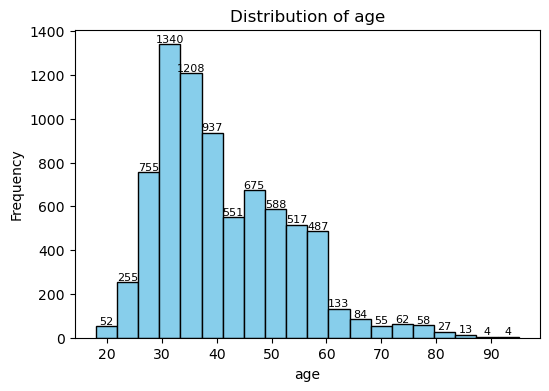

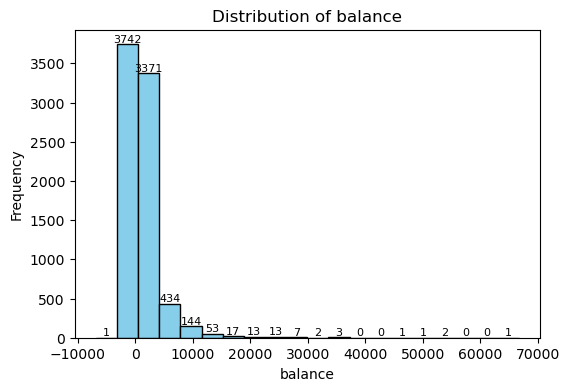

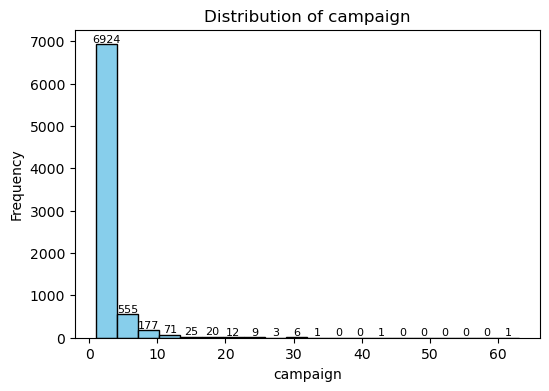

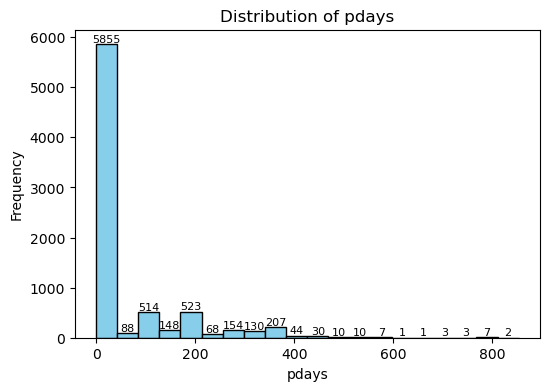

In [ ]:

numerical_features = ['age', 'balance', 'campaign', 'pdays']

for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    n, bins, patches = plt.hist(df[feature], bins=20, color='skyblue', edgecolor='black')
    
    for i in range(len(patches)):
        plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, n[i],   # Position of the text
                 str(int(n[i])),                              # Convert frequency to integer
                 ha='center', va='bottom', fontsize=8)        # Align and style
    
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


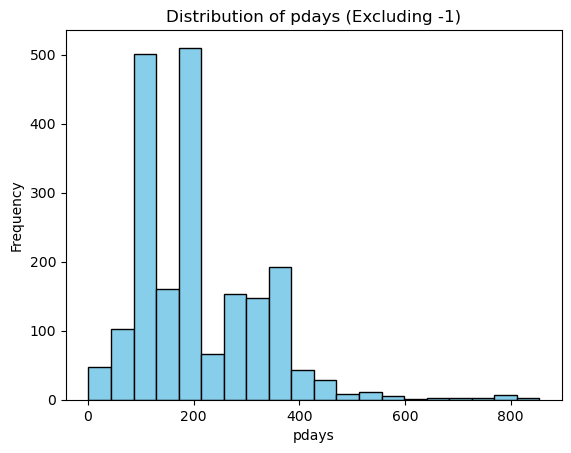

Number of rows with pdays = -1: 5809


In [ ]:
pdays_negative_one = df[df['pdays'] == -1].shape[0]

pdays_positive = df[df['pdays'] != -1]['pdays']

plt.hist(pdays_positive, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of pdays (Excluding -1)')
plt.xlabel('pdays')
plt.ylabel('Frequency')
plt.show()

print(f"Number of rows with pdays = -1: {pdays_negative_one}")

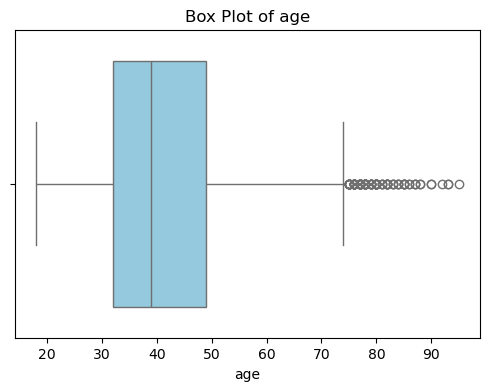

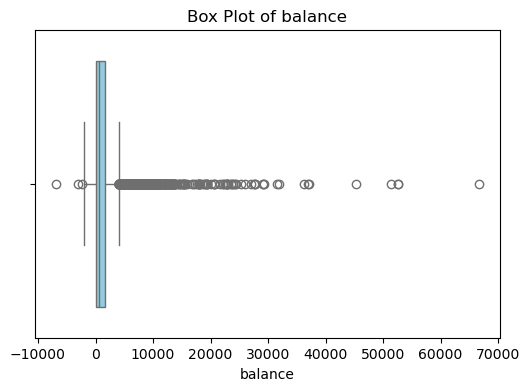

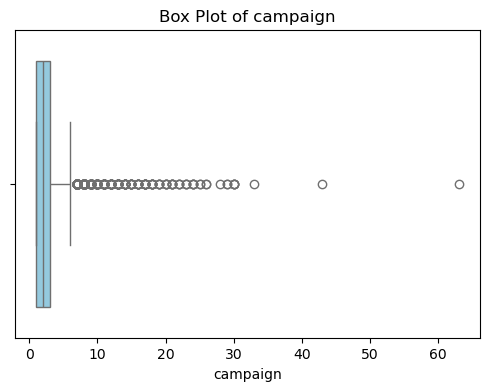

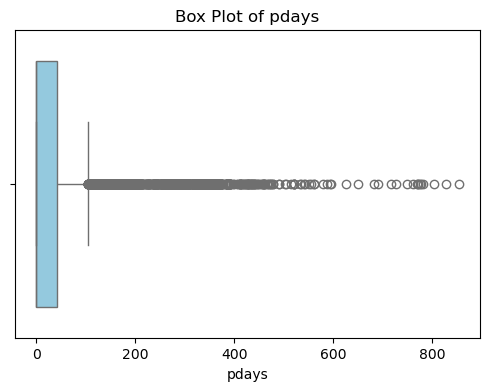

In [169]:

for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.show()


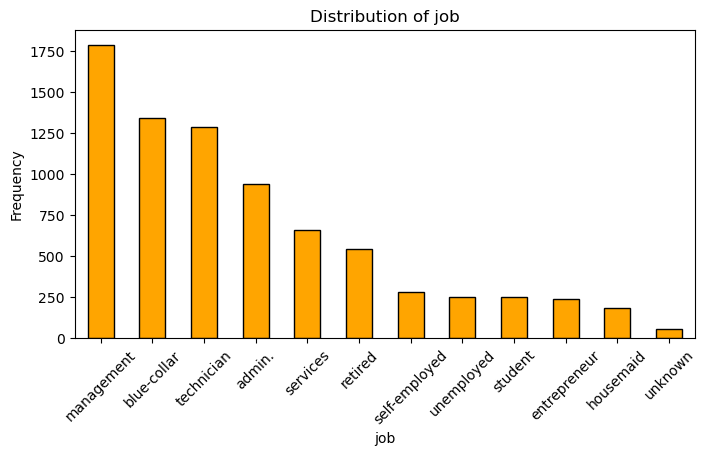

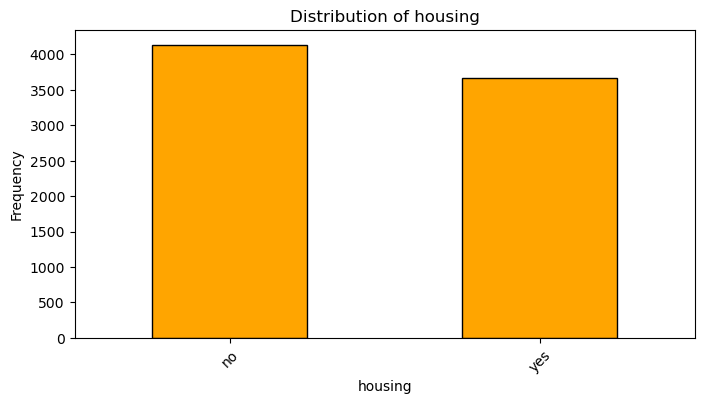

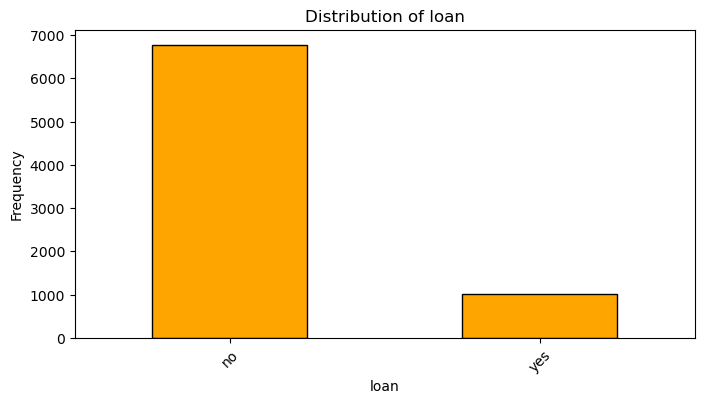

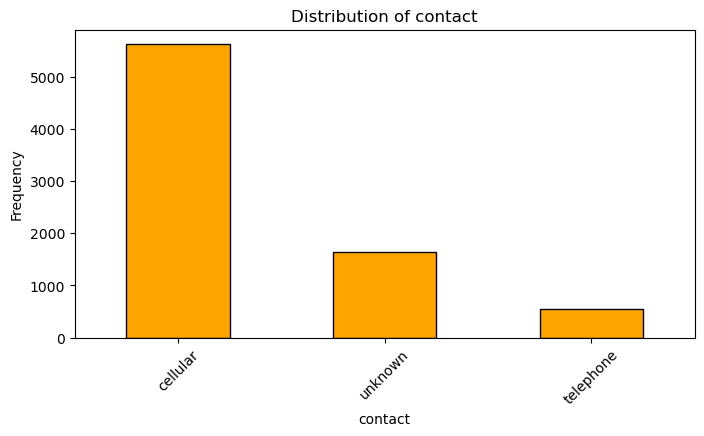

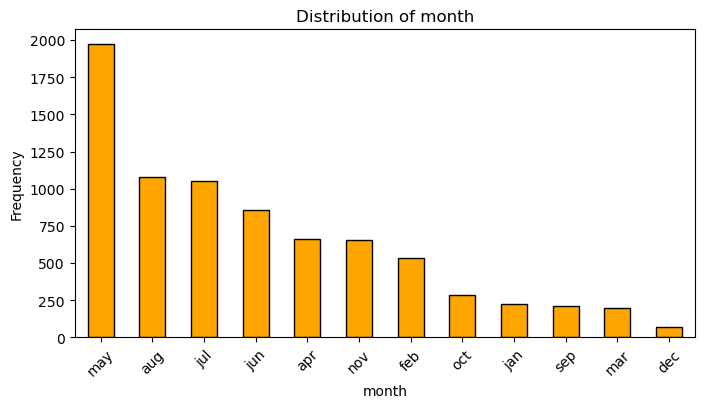

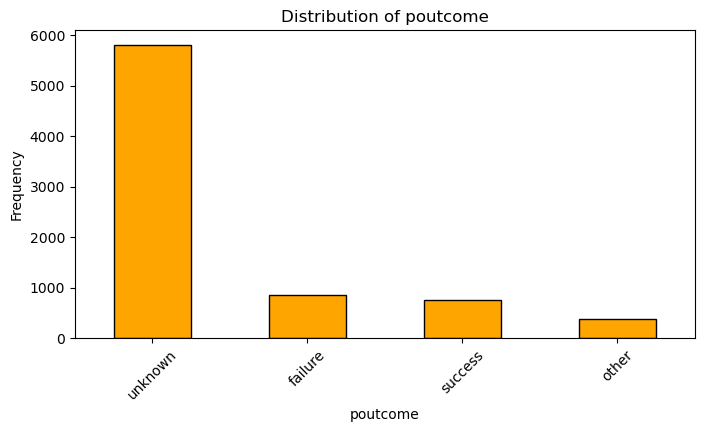

In [ ]:
categorical_features = ['job', 'housing', 'loan', 'contact', 'month', 'poutcome']

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    df[feature].value_counts().plot(kind='bar', color='orange', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()


In [171]:
df.loc[:, 'deposit'] = df['deposit'].map({'yes': 1, 'no': 0})

In [ ]:

category_poutcome= df['poutcome'].value_counts()
print(category_poutcome)

poutcome
unknown    5811
failure     848
success     761
other       385
Name: count, dtype: int64


The categories (unknown, failed, success, other) represent the outcome of previous marketing campaigns:

- success: The previous campaign succeeded (likely a positive indicator for deposit subscription).
- failed: The previous campaign failed.
- other: Outcome not classified as success or failed.
- unknown: No previous campaign data available for this client.

In [173]:
# Analyze the relationship with the target variable
#grouped = df.groupby('poutcome')['deposit'].count()
#print(grouped)

counts = pd.crosstab(df['poutcome'], df['deposit'])
print(counts)


deposit      0     1
poutcome            
failure    413   435
other      159   226
success     65   696
unknown   3438  2373


### Unknown category of jobs

In [174]:
#['job', 'housing', 'loan', 'contact', 'month', 'poutcome']#
category_jobs= df['job'].value_counts()
print(category_jobs)

job
management       1789
blue-collar      1343
technician       1289
admin.            936
services          658
retired           540
self-employed     280
unemployed        249
student           247
entrepreneur      236
housemaid         184
unknown            54
Name: count, dtype: int64


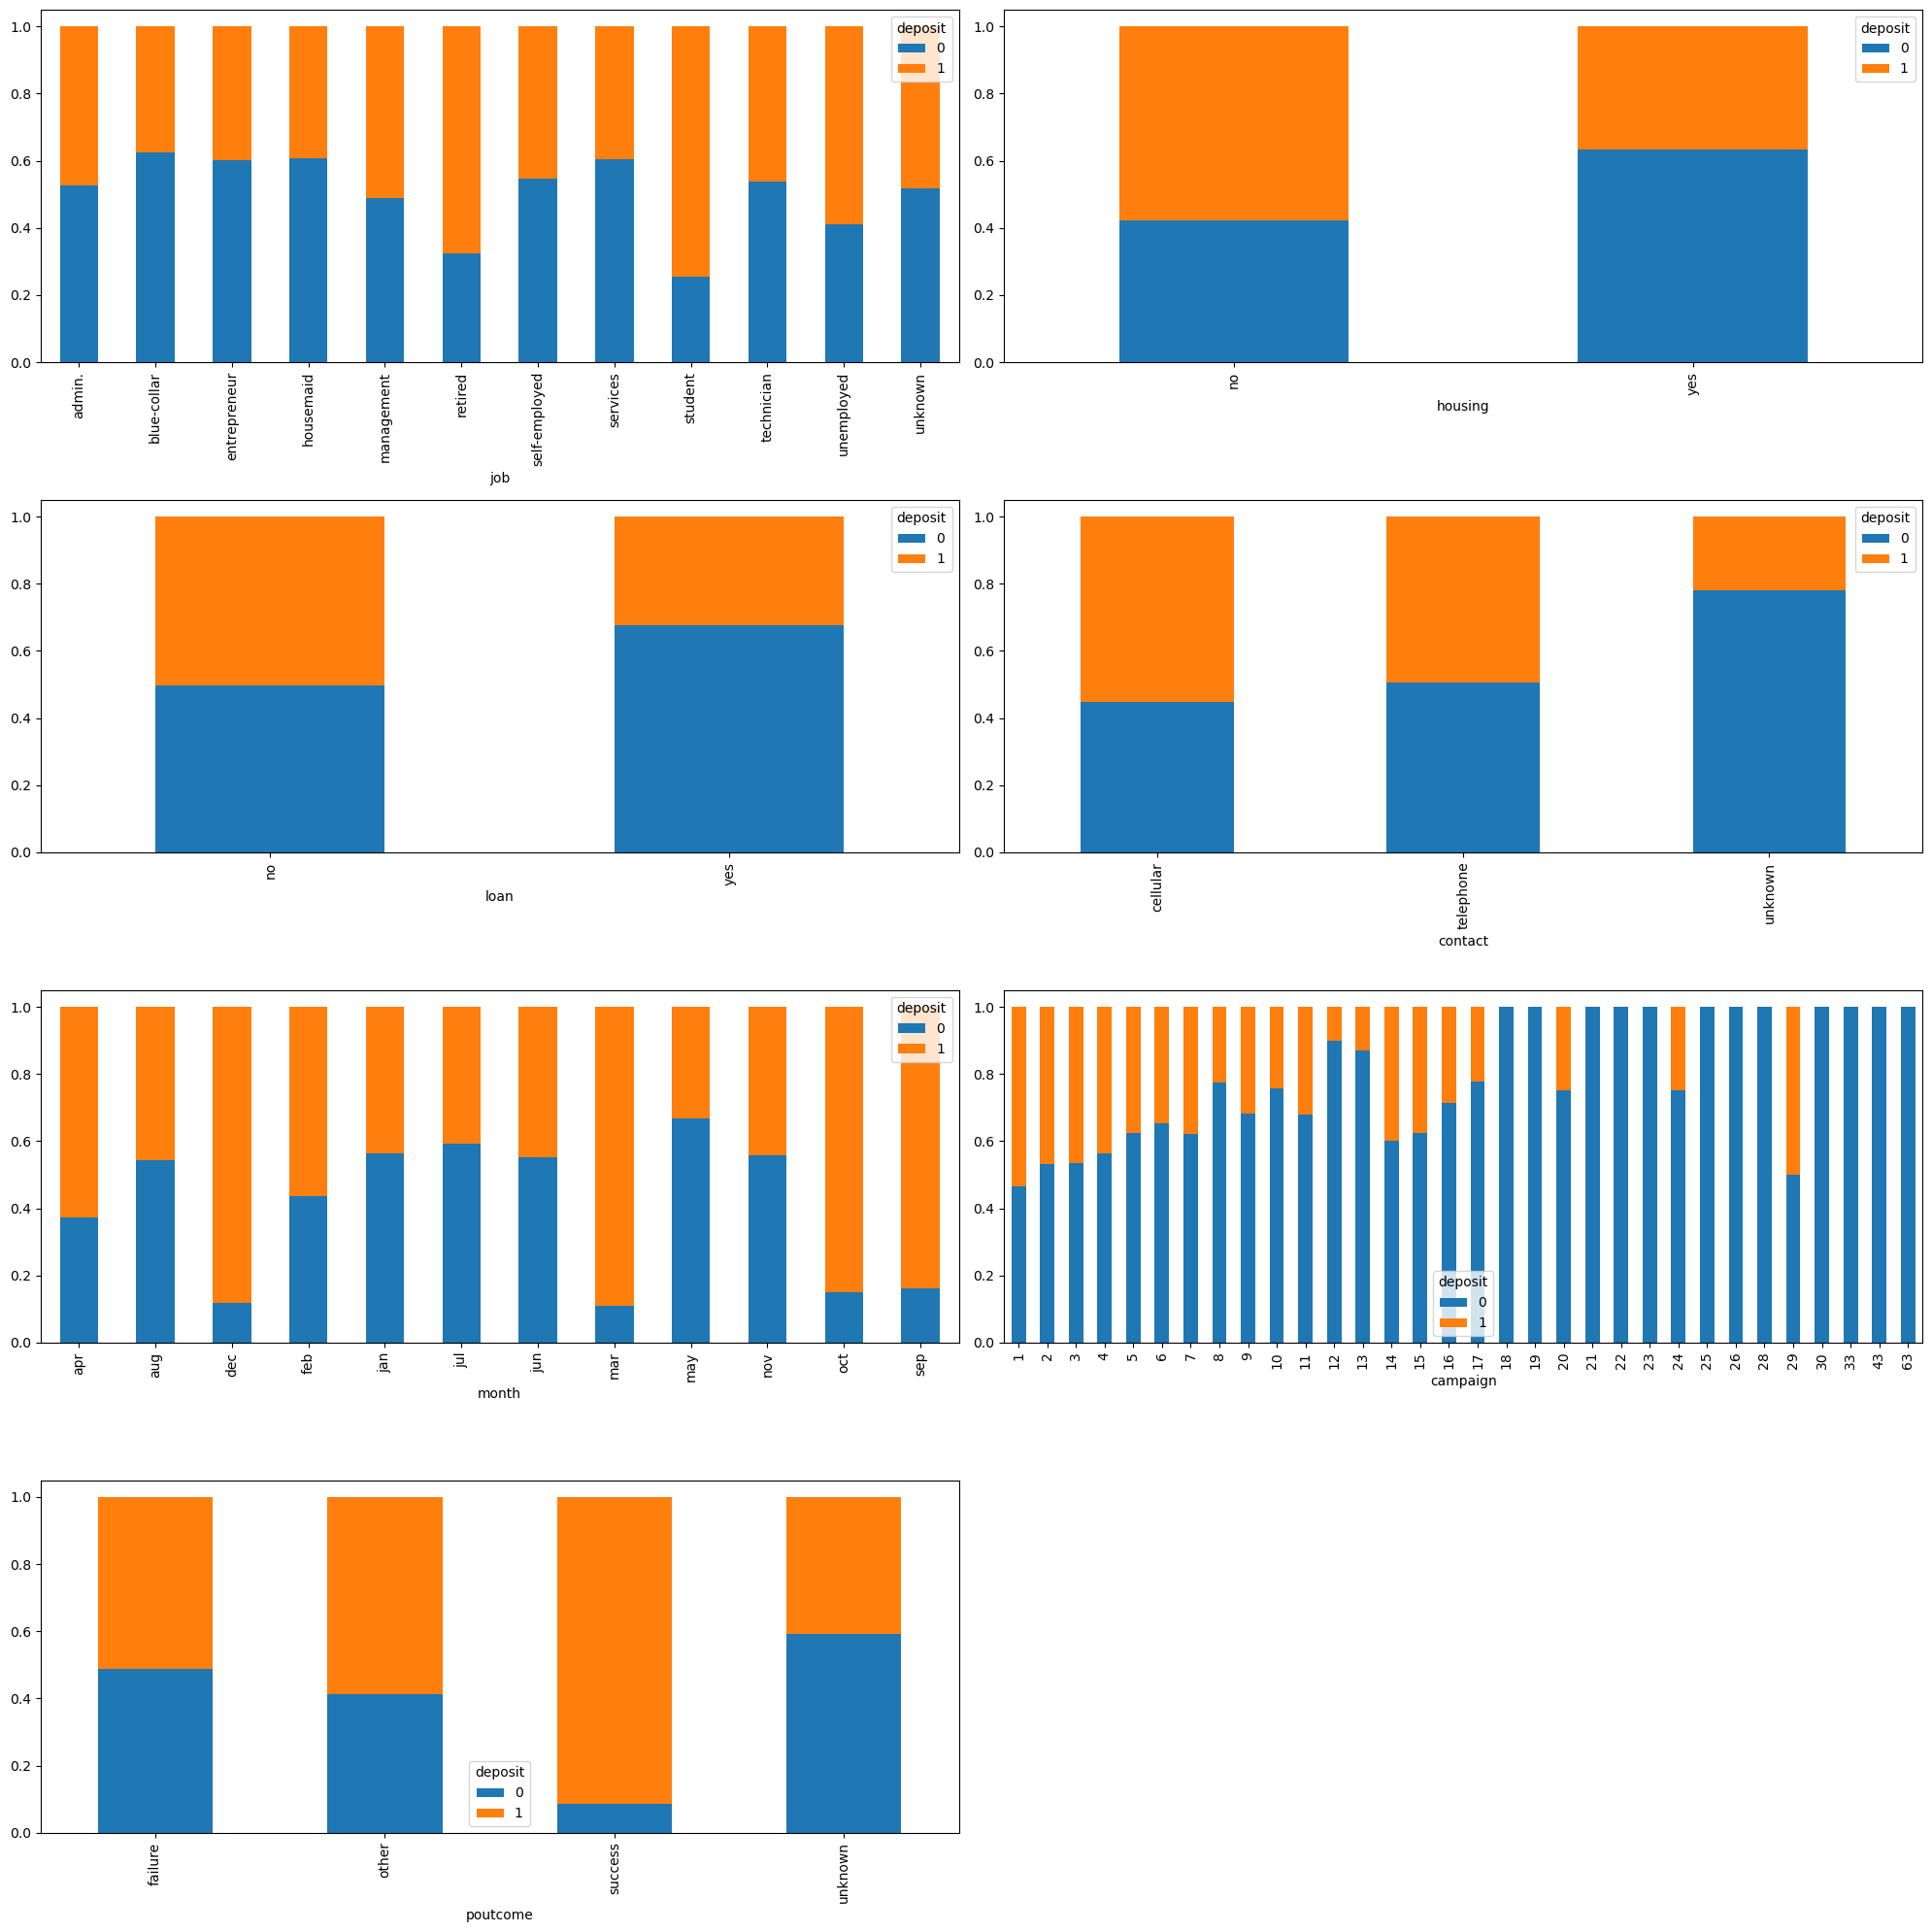

In [175]:
count = 0
fig = plt.figure(figsize=(20,20))

for i in df.drop(columns=['deposit','age','pdays','balance']).columns:
    count +=1
    ax= plt.subplot(4,2,count)
    pd.crosstab(df[i],df['deposit'],normalize=0).plot(kind='bar',stacked=True,ax=ax)
    fig.tight_layout()

plt.show()

1. Specific Customer Groups
- Certain professions for example students, retiree shows higher deposit subscription rates. Based on this data bank can focusing the campaigns on these groups, because they may be more likely to respond positively. On the other hand, for the job groups with lower rates, tailor messaging to address their specific needs or barriers.
- Based on the data above, customers without housing or personal loans may be more receptive to deposit products. Highlight savings or benefits to those already free of significant debt.
2. Channel of Campaign Strategies
- Contact Type: the "cellular"channel leads to higher deposit subscriptions compared to "unknown" or other methods, this data can result prioritize mobile communication. Consider using personalized SMS or mobile app notifications.
- Previous Campaign Outcomes (poutcome): A successful outcome in previous campaigns strongly predicts success in current campaign so this data can be use to build a segmented list of "likely" subscribers and marketing can focus efforts on this lists.
- Campaign Frequency: Look at the optimal number of contacts. If subscription rates drop after a certain number of calls (e.g., diminishing returns after 3-5 contacts), refine the contact strategy to reduce costs and avoid customer fatigue.
3. Seasonal or Time-Based Marketing
Month: Seasonal trends in deposits can guide the timing of campaigns. For instance, if certain months (e.g., May, October) show higher success rates, launch major campaigns during those periods to maximize returns.
Duration of Campaign: Track the effectiveness of campaign duration (e.g., does a longer campaign lead to better engagement?).


## Correlation metric

In [ ]:
numerical_df = df.select_dtypes(include=['number'])

correlation_matrix = numerical_df.corr()

print(correlation_matrix)

               age   balance  campaign     pdays
age       1.000000  0.099788  0.001287  0.008250
balance   0.099788  1.000000 -0.010643  0.011158
campaign  0.001287 -0.010643  1.000000 -0.104922
pdays     0.008250  0.011158 -0.104922  1.000000


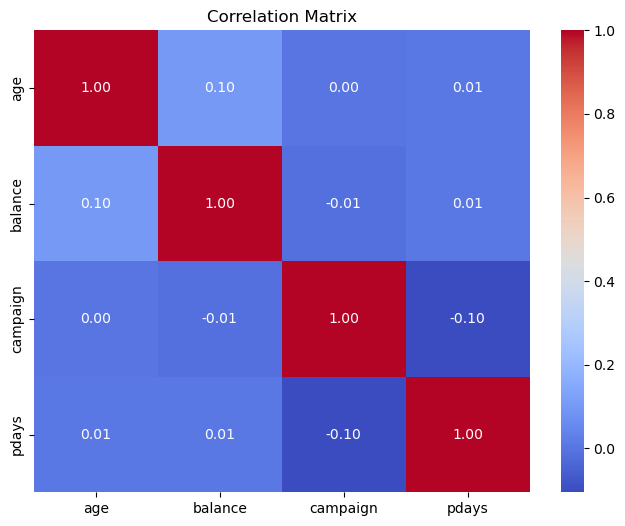

In [177]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

- Correlation values range from -1 (perfect negative relationship) to 1 (perfect positive relationship).
Values close to 0 indicate no linear relationship between two features.

- Detail metrix intepretation
    - age and balance: Correlation = 0.0998 -> weak positive relationship
    - age and campaign: Correlation = 0.0013 -> may have no relationship.
    - age and pdays: Correlation = 0.0083 -> may have no relationship.
    - balance and campaign: Correlation = -0.0106 no significant relationship.
    - balance and pdays: Correlation = 0.0112 may have no relationship.
    - campaign and pdays: Correlation = -0.1049 very weak negative relationship

- the correlations are low from features, showing that they are not linearly related to each other.
- so that Including these features in the model will probably not introduce redundancy due to high correlations between pairs because Each feature may provide something different to the model.

## Check VIF data

In [178]:
X = df[['age','balance','campaign','pdays']]
y = df['deposit']

In [ ]:

def calc_vif(x):

    vif = pd.DataFrame()
    vif['variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
        
    return (vif) 

In [180]:
#calc_vif(X.drop(columns='const'))
calc_vif(X)

,variables,VIF
0,age,2.251682
1,balance,1.250739
2,campaign,1.748965
3,pdays,1.214343


1. VIF data benchmark 
    - VIF = 1: No multicollinearity.
    - 1 < VIF < 5: Moderate multicollinearity, acceptable in most cases.
    - VIF > 5: High multicollinearity, consider removing or combining variables.
    - VIF > 10: Severe multicollinearity, strong action needed (e.g., feature engineering or regularization).

2. VIF Value anaylis
The VIF values you provided (age: 2.25, balance: 1.25, campaign: 1.75, pdays: 1.21) are below 5 it shows acceptable levels of multicollinearity.
Expected: Even though the correlation matrix is low, the moderate VIF values suggest that each feature has a small amount of shared variance with the other features when considered collectively.
4. Since the VIF values are all below 5 then we can Keep all features in the model, because the multicollinearity is not a concern here. after adding the feature we need to monitor multicollinearity again if you add more features to the dataset.

## Check Unknown Jobs type

In [181]:
# Count and proportion of 'unknown' job types
unknown_jobs_count = df[df['job'] == 'unknown'].shape[0]
total_jobs_count = df.shape[0]
unknown_jobs_proportion = unknown_jobs_count / total_jobs_count

print(f"Count of 'unknown' job types: {unknown_jobs_count}")
print(f"Proportion of 'unknown' job types: {unknown_jobs_proportion:.2%}")

Count of 'unknown' job types: 54
Proportion of 'unknown' job types: 0.69%


In [182]:
# Success rate for 'unknown' job type
unknown_job_success_rate = df[df['job'] == 'unknown']['deposit'].mean()
print(f"Success rate for 'unknown' job type: {unknown_job_success_rate:.2%}")

Success rate for 'unknown' job type: 48.15%


In [183]:
# Filter data for 'unknown' job type
unknown_job_df = df[df['job'] == 'unknown']

# Summary statistics for 'unknown' group
print("Summary Statistics for 'unknown' job type:")
print(unknown_job_df.describe())

# Distribution of poutcome, contact, and deposit for 'unknown' job type
print("\nPoutcome distribution for 'unknown' job type:")
print(unknown_job_df['poutcome'].value_counts())

print("\nContact type distribution for 'unknown' job type:")
print(unknown_job_df['contact'].value_counts())

print("\nDeposit success rate for 'unknown' job type:")
unknown_success_rate = unknown_job_df['deposit'].mean()
print(f"{unknown_success_rate:.2%}")




Summary Statistics for 'unknown' job type:
             age       balance   campaign       pdays
count  54.000000     54.000000  54.000000   54.000000
mean   48.000000   2071.555556   3.018519   52.685185
std    12.440045   3773.355614   3.218407  126.953241
min    26.000000      0.000000   1.000000   -1.000000
25%    39.500000    250.250000   1.000000   -1.000000
50%    47.500000    655.500000   2.000000   -1.000000
75%    55.000000   2124.500000   3.000000   64.250000
max    78.000000  19268.000000  16.000000  683.000000

Poutcome distribution for 'unknown' job type:
poutcome
unknown    40
success     7
failure     7
Name: count, dtype: int64

Contact type distribution for 'unknown' job type:
contact
cellular     36
telephone    10
unknown       8
Name: count, dtype: int64

Deposit success rate for 'unknown' job type:
48.15%


In [184]:
# comparet to other job types
known_job_df = df[df['job'] != 'unknown']
print("\nComparison of average balance:")
print("Unknown:", unknown_job_df['balance'].mean())
print("Known:", known_job_df['balance'].mean())



Comparison of average balance:
Unknown: 2071.5555555555557
Known: 1510.083602115856


## Unknown category for the contact

These are the unknown values in the 'contact' field create a problems and reduce the understanding of how this contact type affects the 'campaign' outcome. To solve this, we need to understand the behaviour of the contact user later


In [185]:
category_contact= df['contact'].value_counts()
print(category_contact)

contact
cellular     5623
unknown      1636
telephone     546
Name: count, dtype: int64


In [186]:
# Analyze the relationship with the target variable
#grouped = df.groupby('poutcome')['deposit'].count()
#print(grouped)

counts = pd.crosstab(df['contact'], df['deposit'])
print(counts)


deposit       0     1
contact              
cellular   2524  3099
telephone   276   270
unknown    1275   361


In [187]:
# Proportion of successful deposits for unknown and then compare with other contact types
unknown_success_rate = df[df['contact'] == 'unknown']['deposit'].mean()
print("Success rate for 'unknown':", unknown_success_rate)

contact_success_rates = df.groupby('contact')['deposit'].mean()
print(contact_success_rates)

Success rate for 'unknown': 0.2206601466992665
contact
cellular     0.551129
telephone    0.494505
unknown       0.22066
Name: deposit, dtype: object


the unknown success rate has different behaviour then celular and telephone data. which means this group is diffferent category of campaign channel so that we will keep unknown group for further insights. we can see the success rate of cellular is higher than telepohone and unkwown channel. thats why the marketing effort need to be more focus on cellular channel than other channel. the unknown channel data need to be improved since this channel shows different behaviour of success rate

## Check class imbalances

In [188]:
X = df.drop(columns='deposit')
y = df['deposit']
y.value_counts() / len(y)
#check for imbalance

deposit
0    0.522101
1    0.477899
Name: count, dtype: float64

The class has almost same proportion within two category so we can say that this data is not imbalance. So in this case we dont need to do imbalance treatment

### Deeper understanding for poutcome other

In [ ]:
# Filter for poutcome = 'other'
other_data = df[df['poutcome'] == 'other']

print(other_data['pdays'].describe())

count    385.000000
mean     220.272727
std      127.907807
min        2.000000
25%      115.000000
50%      194.000000
75%      321.000000
max      805.000000
Name: pdays, dtype: float64


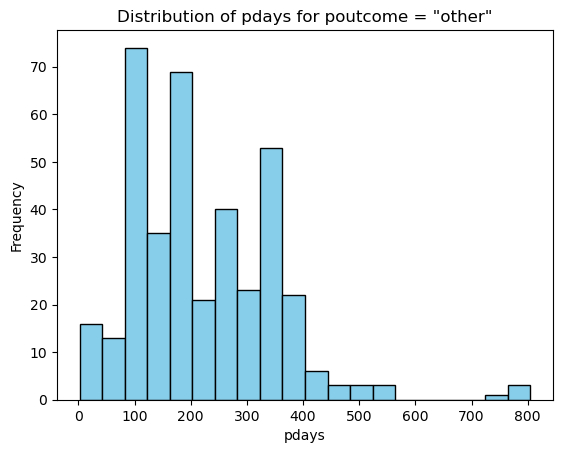

In [190]:
# Histogram of pdays for 'other'
plt.hist(other_data['pdays'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of pdays for poutcome = "other"')
plt.xlabel('pdays')
plt.ylabel('Frequency')
plt.show()

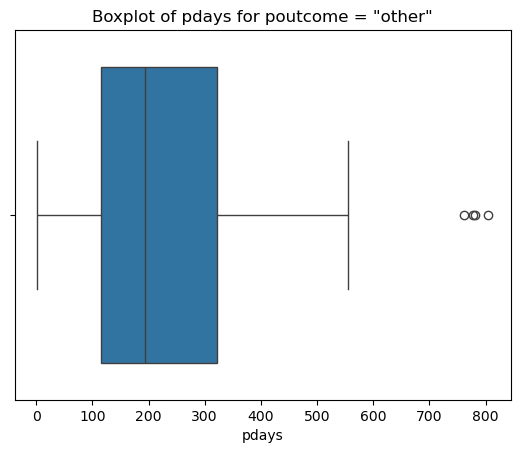

In [191]:

sns.boxplot(x=other_data['pdays'])
plt.title('Boxplot of pdays for poutcome = "other"')
plt.xlabel('pdays')
plt.show()

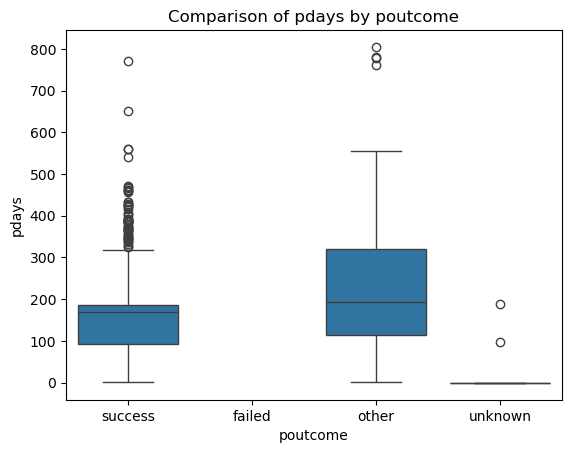

In [192]:
sns.boxplot(data=df, x='poutcome', y='pdays', order=['success', 'failed', 'other', 'unknown'])
plt.title('Comparison of pdays by poutcome')
plt.xlabel('poutcome')
plt.ylabel('pdays')
plt.show()


from the box plot above we can see that 
1. the poutcome type unknown has pdays which makes no sense since the unkown poutcome indicate the group of user that has not been given the campaign before so this values will be treated as outliers
2. poutcome others has significant outliers where pdays above 700
3. success poutcome has significant outliers where pdays above 500

In [ ]:
# Filter data for poutcome = 'failed'
failed_data = df[df['poutcome'] == 'failed']

print(failed_data['pdays'].describe())

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: pdays, dtype: float64


In [194]:
# Calculate success rate for 'failed' poutcome
failed_success_rate = df[df['poutcome'] == 'failed']['deposit'].mean() * 100

# Display the result
print(f"Success Rate for 'failed' poutcome: {failed_success_rate:.2f}%")

Success Rate for 'failed' poutcome: nan%


In [ ]:
# Total rows for poutcome = 'other'
total_other = len(df[df['poutcome'] == 'other'])

no_contact_other = len(df[(df['poutcome'] == 'other') & (df['pdays'] == -1)])

no_contact_proportion = no_contact_other / total_other
print(f"Proportion of 'other' with pdays = -1: {no_contact_proportion:.2%}")

Proportion of 'other' with pdays = -1: 0.00%


### Deeper understanding of contact behaviour

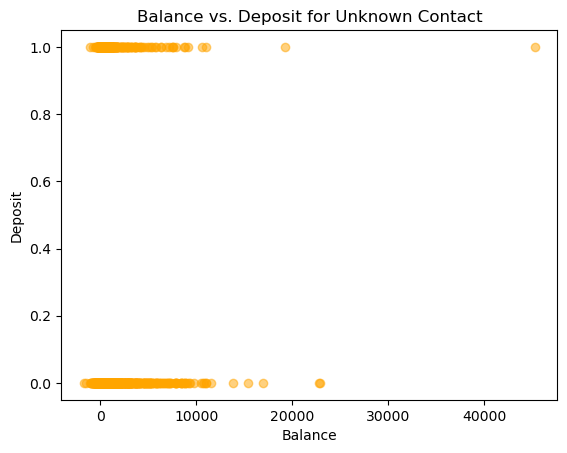

In [196]:
unknown_contact_data = df[df['contact'] == 'unknown']
plt.scatter(unknown_contact_data['balance'], unknown_contact_data['deposit'], alpha=0.5, color='orange')
plt.title('Balance vs. Deposit for Unknown Contact')
plt.xlabel('Balance')
plt.ylabel('Deposit')
plt.show()


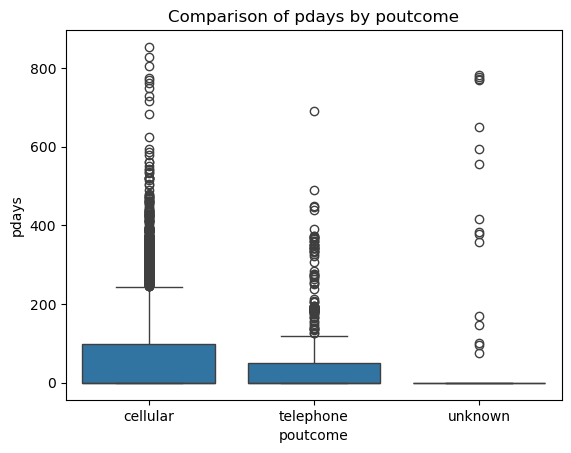

In [197]:
sns.boxplot(data=df, x='contact', y='pdays', order=['cellular', 'telephone','unknown'])
plt.title('Comparison of pdays by poutcome')
plt.xlabel('poutcome')
plt.ylabel('pdays')
plt.show()

### Deeper understanding `pdays` - `poutocome` - `campaign` - `month`

In [198]:
# Encode poutcome for correlation analysis
df['poutcome_encoded'] = df['poutcome'].map({'unknown': 0, 'failure': 1, 'success': 2, 'other': 3})



In [199]:
# Correlation matrix
correlation_matrix = df[['pdays', 'poutcome_encoded', 'campaign']].corr()
print(correlation_matrix)



                     pdays  poutcome_encoded  campaign
pdays             1.000000          0.714012 -0.104922
poutcome_encoded  0.714012          1.000000 -0.113446
campaign         -0.104922         -0.113446  1.000000


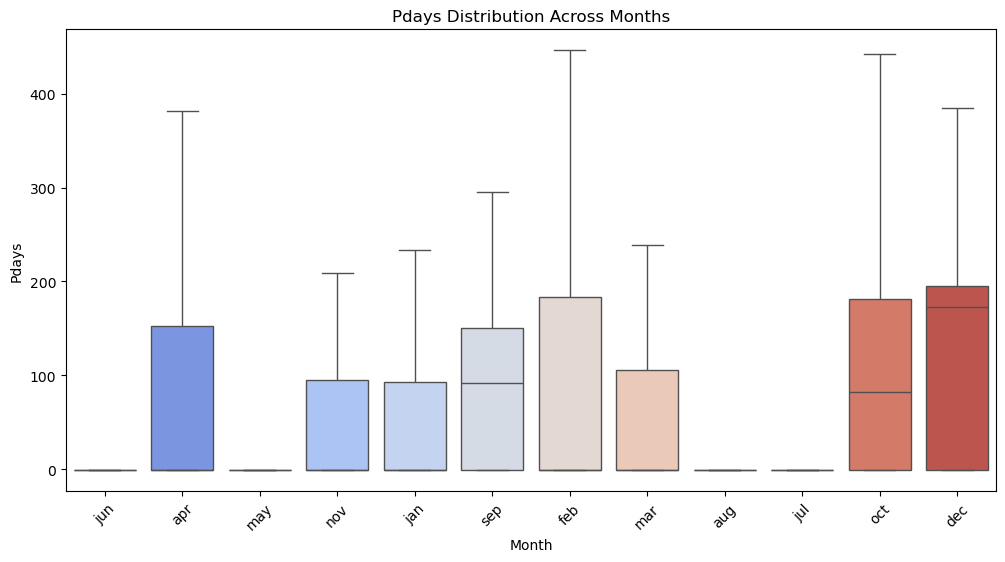

In [200]:
# Box plot: Pdays vs Month
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='pdays', data=df, showfliers=False, palette="coolwarm")
plt.title('Pdays Distribution Across Months')
plt.xlabel('Month')
plt.ylabel('Pdays')
plt.xticks(rotation=45)
plt.show()

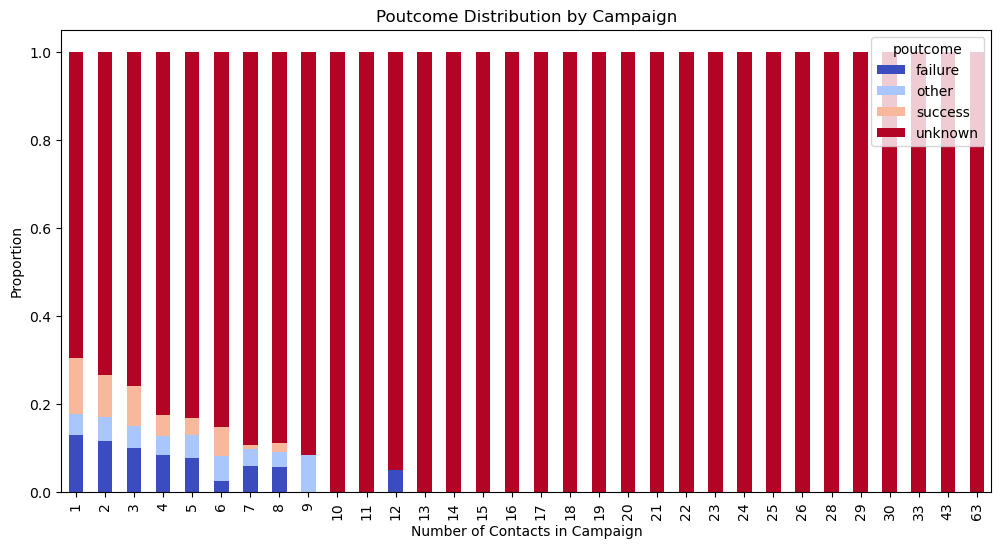

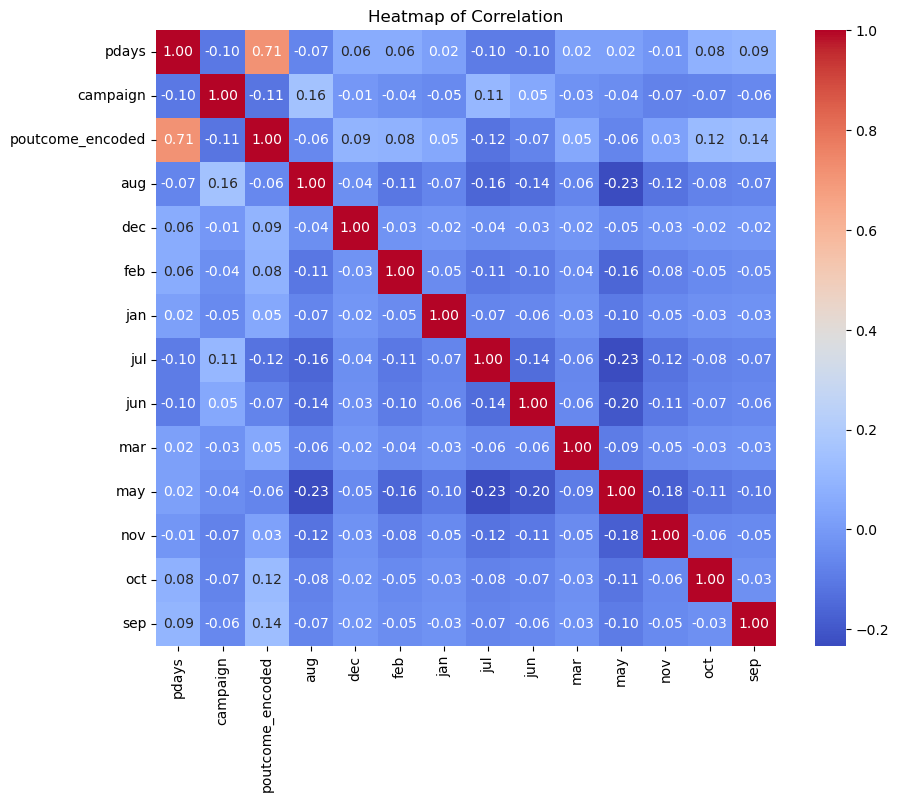

In [ ]:
# Bar plot: Proportion of poutcome by campaign
campaign_poutcome = df.groupby(['campaign', 'poutcome'])['poutcome'].count().unstack(fill_value=0)
campaign_poutcome = campaign_poutcome.div(campaign_poutcome.sum(axis=1), axis=0)  # Normalize
campaign_poutcome.plot(kind='bar', stacked=True, figsize=(12, 6), colormap="coolwarm")
plt.title('Poutcome Distribution by Campaign')
plt.ylabel('Proportion')
plt.xlabel('Number of Contacts in Campaign')
plt.show()
##
# Heatmap: Correlation between month, campaign, pdays, and poutcome_encoded
encoded_month = pd.get_dummies(df['month'], drop_first=True)  # Encode month for correlation
df_corr = pd.concat([df[['pdays', 'campaign', 'poutcome_encoded']], encoded_month], axis=1)
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Correlation")
plt.show()

In [ ]:
# Filter the data for unknown poutcome and campaign = 1
unknown_poutcome = df[df['poutcome'] == 'unknown']
unknown_poutcome_campaign_1 = unknown_poutcome[unknown_poutcome['campaign'] == 1]

percentage = (len(unknown_poutcome_campaign_1) / len(unknown_poutcome)) * 100

# Print the result
print(f"Percentage of 'unknown' poutcome with 1 campaign: {percentage:.2f}%")


Percentage of 'unknown' poutcome with 1 campaign: 40.08%


### investigation of unknown `poutcome` to other variable

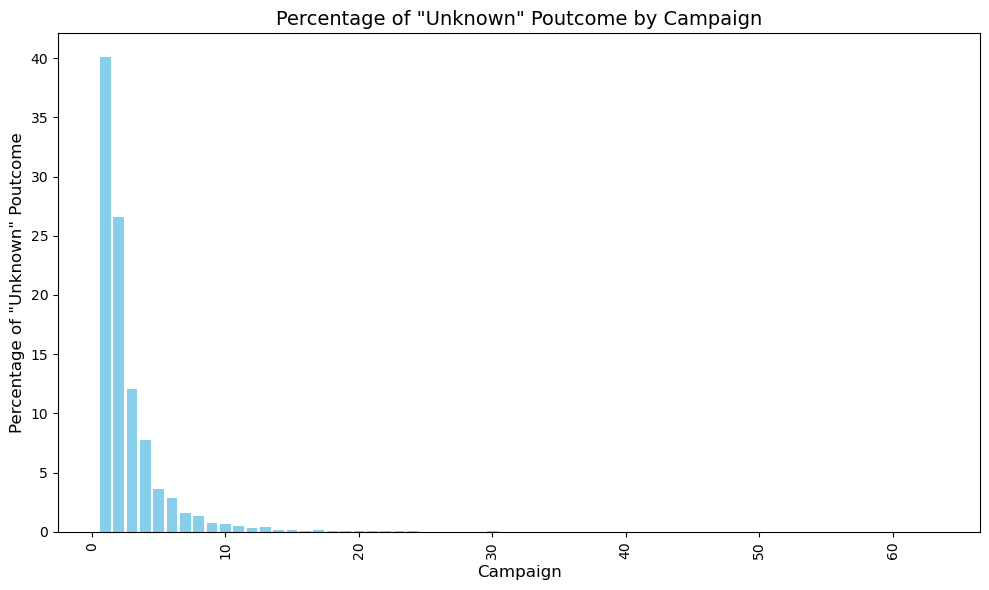

In [203]:
# Filter rows where poutcome is "unknown"
unknown_poutcome = df[df['poutcome'] == 'unknown']

# Count the total rows with "unknown" poutcome
total_unknown = len(unknown_poutcome)

# Calculate the percentage for each campaign value
campaign_counts = unknown_poutcome['campaign'].value_counts()
campaign_percentage = (campaign_counts / total_unknown) * 100


#print("Percentage of 'unknown' poutcome for each campaign value:")
#print(campaign_percentage)

plt.figure(figsize=(10, 6))
plt.bar(campaign_percentage.index, campaign_percentage.values, color='skyblue')
plt.title('Percentage of "Unknown" Poutcome by Campaign', fontsize=14)
plt.xlabel('Campaign', fontsize=12)
plt.ylabel('Percentage of "Unknown" Poutcome', fontsize=12)
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

in this case, the campaign data is represented the number of contact that is made to the user on the campaign. This graph shows that the most majority of contact that is made is at 1 time in campaign. it means that the more number of contact that being made on campaign period will make the response lower 

## Outliers treatment

Treat pdays as a local outliers and categorized pdays by poutcome category

In [ ]:
#  'unknown' poutcome: drop rows where pdays != -1
df = df[~((df['poutcome'] == 'unknown') & (df['pdays'] != -1))]

# other' poutcome: drop rows where pdays > 700
df = df[~((df['poutcome'] == 'other') & (df['pdays'] > 700))]

# poutcome: drop rows where pdays > 500
df = df[~((df['poutcome'] == 'success') & (df['pdays'] > 500))]

# Verify by checking the summary of 'pdays' after outlier removal
print(df['pdays'].describe())


count    7794.000000
mean       50.701309
std       105.917403
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        34.750000
max       854.000000
Name: pdays, dtype: float64


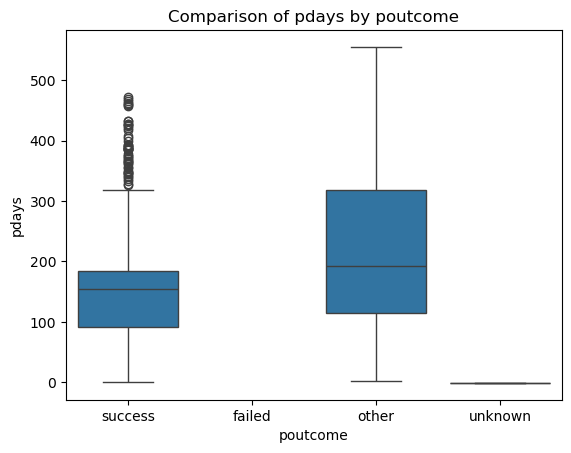

In [205]:
sns.boxplot(data=df, x='poutcome', y='pdays', order=['success', 'failed', 'other', 'unknown'])
plt.title('Comparison of pdays by poutcome')
plt.xlabel('poutcome')
plt.ylabel('pdays')
plt.show()


age as general outlier

In [206]:
# List of columns to check for outliers
columns_to_check = ['age', 'balance', 'campaign']

# Create a dictionary to store outliers
outliers = {}

for column in columns_to_check:
    # Calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outlier_data = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers[column] = outlier_data
    
    print(f"Unique outlier values in {column}:")
    print(outlier_data[column].unique())

    print(f"Outliers in {column}: {outlier_data.shape[0]}")

# You can also inspect the outliers
for column, outlier_data in outliers.items():
    print(f"\nOutliers in {column}:")
    print(outlier_data[[column]].head())  


Unique outlier values in age:
[79 82 76 75 93 77 80 87 81 92 88 84 83 78 85 95 86 90]
Outliers in age: 121
Unique outlier values in balance:
[-3058  4803  4808  4929  6651  8725  5953 13658  7177  4570 15341  4151
  4119  8781  7336  4189  8379  6281 51439  4790  6158 12737  4374 12972
  5517  4579 13849  7066  4388  5724  6013  8876  5583  4833 14930  9317
  5222 14968  6512  4930  6840  7005  7818  9051  6337  4041  7098  4099
  4822  4210  7863  5169  4406 10583  4464  4721 25290  4121  6979  7298
  7019  4733 13818 25947  6542  6690  4145  7560  4984  5827  8919 13156
  4596 10943 12264  4118  5872  4366 17297  8535  4645  4401  4641 19268
  6746  4945  4324 37127  8295  4642  5559  8491 13711  4293  4344 17964
  4157  4089  5037  5920  7051  5154  7702  7984  6242  4023  5571  5539
  5801  4527 14144  9072  4112  5016  7506  7503  4613  4117 10596  6641
  4136  5903  7968  8000  5276 10884 17924 14646  4060  5313  4910  8023
  6929 10041  9192 10346  5701  4328  6101  5679  5426 1

In [ ]:

columns_to_check = ['age', 'balance', 'campaign']


mask = pd.Series([True] * df.shape[0], index=df.index)

for column in columns_to_check:
 
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    mask &= (df[column] >= lower_bound) & (df[column] <= upper_bound)


df_cleaned = df[mask].reset_index(drop=True)  # Resetting the index to avoid index misalignment


print(f"Rows before dropping outliers: {df.shape[0]}")
print(f"Rows after dropping outliers: {df_cleaned.shape[0]}")


Rows before dropping outliers: 7794
Rows after dropping outliers: 6572


### check imbalance data after cleaning

In [212]:
#X = df_cleaned .drop(columns='deposit')
y_cleaned = df_cleaned ['deposit']
y_cleaned.value_counts() / len(y_cleaned)
#check for imbalance

deposit
0    0.524802
1    0.475198
Name: count, dtype: float64

---
# Strategy of Experimentation

There will be some strategy to achieve the best model : 

    1. Strategy
        - random search of the 
    2. Strategy 2 
        - random search + grid search hyper parameter method
    3. Strategy 3 
        - ensemble method


Scaling

Standardization (StandardScaler): This method subtracts the mean and divides by the standard deviation, so the resulting values will have a mean of 0 and a standard deviation of 1. It’s useful when the data follows a Gaussian (normal) distribution.

if the features follow a normal distribution and later will be working with models like inear regression, logistic regression, SVMs

In [ ]:

columns_to_scale = ['age', 'balance', 'campaign', 'pdays']


scaler = StandardScaler()

df_cleaned [columns_to_scale] = scaler.fit_transform(df_cleaned[columns_to_scale])


print(df_cleaned [columns_to_scale].head())


        age   balance  campaign     pdays
0  1.326830  0.875446 -0.027660 -0.494242
1  0.962935  2.261789 -0.814582  2.757848
2 -0.219724 -0.903508 -0.814582 -0.494242
3 -0.401672 -0.606507  1.546186 -0.494242
4  0.053197 -0.892320 -0.814582 -0.494242


Encoding

- Binary Encoding is applied to `housing` and `loan` because are binary (yes/no) features.
- One-Hot Encoding is applied to `job`, `contact`, `month`, and `poutcome` as these are nominal (non-ordered) features.

`month` will be applied as one hot encoder because :

- No Natural Order for Campaigns
While months like January through December follow a natural chronological order, this sequence doesn’t necessarily influence the effectiveness of the bank’s marketing campaigns (e.g., deposits). For instance, a campaign in June won’t inherently perform better or worse than one in January. Treating months as ordered values could unintentionally introduce bias into the analysis.

- Avoid Implying a False Relationship
Using Ordinal Encoding assigns numerical values to months (e.g., January = 1, February = 2, ..., December = 12). This method suggests a hierarchical or linear relationship—such as December being "greater" than January—which could mislead some models into interpreting patterns that don’t exist.

- Recognize the Categorical Nature of Campaign Timing
Months, in this context, represent distinct categories rather than points on a continuous timeline. Each month can reflect unique campaign dynamics, and One-Hot Encoding is better suited to capture these differences without enforcing an arbitrary order.

In [214]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'),['job', 'contact', 'month', 'poutcome']),
    ('binary', ce.BinaryEncoder(), ['housing','loan'])
], remainder='passthrough')

In [215]:
df_cleaned.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit,poutcome_encoded
0,1.326830,admin.,0.875446,no,no,cellular,jun,-0.027660,-0.494242,unknown,1,0
1,0.962935,admin.,2.261789,no,no,cellular,may,-0.814582,2.757848,other,1,3
2,-0.219724,services,-0.903508,yes,no,cellular,may,-0.814582,-0.494242,unknown,0,0
3,-0.401672,housemaid,-0.606507,yes,no,telephone,nov,1.546186,-0.494242,unknown,0,0
4,0.053197,admin.,-0.892320,yes,no,cellular,apr,-0.814582,-0.494242,unknown,0,0


In [216]:
x = df_cleaned.drop(columns=['deposit'])
y = df_cleaned['deposit']

In [217]:
feature_names = x.columns

In [218]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: deposit, dtype: object

In [219]:
print(y.dtypes)

object


In [220]:
label_encoder = LabelEncoder()
y_cleaned = label_encoder.fit_transform(y)

In [221]:
print(set(y_cleaned)) 

{0, 1}


In [222]:
x_train,x_test,y_train,y_test=train_test_split(x,y_cleaned,stratify=y_cleaned,test_size=0.2,random_state=2021)

In [223]:
testing = pd.DataFrame(transformer.fit_transform(x_train),columns=transformer.get_feature_names_out())
testing.head()

,onehot__job_blue-collar,onehot__job_entrepreneur,onehot__job_housemaid,onehot__job_management,onehot__job_retired,onehot__job_self-employed,onehot__job_services,onehot__job_student,onehot__job_technician,onehot__job_unemployed,...,onehot__poutcome_unknown,binary__housing_0,binary__housing_1,binary__loan_0,binary__loan_1,remainder__age,remainder__balance,remainder__campaign,remainder__pdays,remainder__poutcome_encoded
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,-0.128750,-0.299335,1.546186,-0.494242,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,-0.583619,-0.367482,-0.027660,2.693359,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,-1.493357,0.716774,-0.027660,0.390179,2.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.872672,-0.283061,0.759263,1.200899,2.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,-1.038488,-1.389694,0.759263,-0.494242,0.0


Modeling

In [224]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgboost = XGBClassifier()
lgbm = lgb.LGBMClassifier()

In [225]:
voting_clf = VotingClassifier(
    estimators=[
        ('logreg_vote', logreg),
        ('rf_vote', rf),
        ('lgbm_vote', lgbm)
    ],
    voting='soft'
)


# Combine into a stacking classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('logreg_stack', logreg),
        ('rf_stack', rf),
        ('lgbm_stack', lgbm)
    ],
    final_estimator=LogisticRegression(solver='liblinear', random_state=42),
    cv=5
)


In [ ]:
list_algo = [logreg, knn, dt, rf, xgboost, lgbm, voting_clf, stacking_clf]
scoring_metrics = ['recall', 'precision', 'f1', 'accuracy']

fold_results = {}

# Loop through different numbers of folds
for num_folds in [3, 5, 7, 10]:
    results = []
    print(f"Evaluating with {num_folds} folds:")
    
    for algo in list_algo:
        # Pipeline
        pipe_model = Pipeline([
            ('preprocessing', transformer),
            ('modeling', algo)
        ])
        
        #  cross-validation
        cv_results = cross_validate(
            estimator=pipe_model,
            X=x_train,
            y=y_train,
            cv=num_folds,  
            scoring=scoring_metrics,
            return_train_score=False
        )
    
        algo_results = {
            'model': algo.__class__.__name__,
            'recall_mean': cv_results['test_recall'].mean(),
            'precision_mean': cv_results['test_precision'].mean(),
            'f1_mean': cv_results['test_f1'].mean(),
            'accuracy_mean': cv_results['test_accuracy'].mean(),
            'recall_std': cv_results['test_recall'].std(),
            'precision_std': cv_results['test_precision'].std(),
            'f1_std': cv_results['test_f1'].std(),
            'accuracy_std': cv_results['test_accuracy'].std(),
        }
        results.append(algo_results)
    
    # result fold
    fold_results[num_folds] = results



Evaluating with 3 folds:
[LightGBM] [Info] Number of positive: 1665, number of negative: 1839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 629
[LightGBM] [Info] Number of data points in the train set: 3504, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.475171 -> initscore=-0.099397
[LightGBM] [Info] Start training from score -0.099397
[LightGBM] [Info] Number of positive: 1666, number of negative: 1839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 630
[LightGBM] [Info] Number of data points in the train set: 3505, number of used features: 35
[

In [229]:
all_results = []
for num_folds, results in fold_results.items():
    for result in results:
        result['folds'] = num_folds
        all_results.append(result)

df_results = pd.DataFrame(all_results)

# Display the results
print(df_results)


                     model  recall_mean  precision_mean   f1_mean  \
0       LogisticRegression     0.573659        0.748221  0.649361   
1     KNeighborsClassifier     0.600078        0.654929  0.626279   
2   DecisionTreeClassifier     0.591279        0.595895  0.593331   
3   RandomForestClassifier     0.622095        0.699808  0.658335   
4            XGBClassifier     0.612491        0.693500  0.650458   
5           LGBMClassifier     0.602882        0.725864  0.658312   
6         VotingClassifier     0.589267        0.753170  0.661036   
7       StackingClassifier     0.592471        0.749835  0.661823   
8       LogisticRegression     0.577664        0.746929  0.651323   
9     KNeighborsClassifier     0.604077        0.655291  0.628523   
10  DecisionTreeClassifier     0.606493        0.605205  0.605791   
11  RandomForestClassifier     0.623696        0.702549  0.660734   
12           XGBClassifier     0.618499        0.690743  0.652512   
13          LGBMClassifier     0.6

In [231]:
output_file = "cross_validation_results.csv"
df_results.to_csv(output_file, index=False)

print(f"Results have been saved to {output_file}")

Results have been saved to cross_validation_results.csv


----
Testing

In [ ]:

results_testing = []

def y_pred_func(model):
    estimator = Pipeline([
        ('preprocess', transformer),
        ('model', model)
    ])
    estimator.fit(x_train, y_train)  
    y_pred = estimator.predict(x_test) 
    y_predict_proba = estimator.predict_proba(x_test)[:, 1] if hasattr(estimator[-1], "predict_proba") else None
    return estimator, y_pred, y_predict_proba


for model, model_name in zip(list_algo, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'Voting', 'Stacking']):
    estimator, y_pred, y_predict_proba = y_pred_func(model)
    
    #  metrics
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_predict_proba) if y_predict_proba is not None else None
    
    #  results
    results_testing.append({
        'model': model_name,
        'recall': recall,
        'precision': precision,
        'f1': f1,
        'accuracy': accuracy,
        'roc_auc': roc_auc
    })




[LightGBM] [Info] Number of positive: 2498, number of negative: 2759
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 638
[LightGBM] [Info] Number of data points in the train set: 5257, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.475176 -> initscore=-0.099378
[LightGBM] [Info] Start training from score -0.099378
[LightGBM] [Info] Number of positive: 2498, number of negative: 2759
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 638
[LightGBM] [Info] Number of data points in the train set: 5257, number of used features: 36
[LightGBM] [Info] [binary:

In [ ]:

results_df_testing = pd.DataFrame(results_testing)

# Sort results by precision
results_df_testing.sort_values(by='precision', ascending=False, inplace=True)
print(results_df_testing)

                 model  recall  precision        f1  accuracy   roc_auc
6               Voting  0.5984   0.771134  0.673874  0.724715  0.789649
7             Stacking  0.6144   0.771084  0.683882  0.730038  0.792257
5             LightGBM  0.6064   0.767206  0.677391  0.725475  0.775687
0  Logistic Regression  0.5872   0.755144  0.660666  0.713308  0.776897
3        Random Forest  0.6304   0.724265  0.674080  0.710266  0.765381
4              XGBoost  0.5952   0.716763  0.650350  0.695817  0.745523
1                  KNN  0.6000   0.679348  0.637213  0.675285  0.719853
2        Decision Tree  0.6384   0.624413  0.631329  0.645627  0.645287


---
LGBM Hyper paramer tuning

In [234]:
estimator=Pipeline([
    ('preprocess',transformer),
    ('model',lgbm)
])

In [235]:
hyperparam_space=[{
    'model__max_bin': [255, 275],
    'model__num_leaves':[31, 21],
    'model__min_data_in_leaf': [20, 15],
   'model__num_iterations':[100,75],
    'model__learning_rate': [0.1, 0.075],
    'model__random_state': [42]
}]

In [236]:
hyperparam_space2=[{
    'model__max_bin': [255, 275, 300, 230],
    'model__num_leaves':[31, 21, 41, 51],
    'model__min_data_in_leaf': [20, 15, 30, 40],
   'model__num_iterations':[100,75, 125, 150],
    'model__learning_rate': [0.1, 0.075, 0.125, 0.05],
    'model__random_state': [42]
}]

In [237]:
grid = GridSearchCV(estimator, n_jobs=-1, param_grid=hyperparam_space, scoring='precision', cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42))

In [238]:
grid.fit(x_train,y_train)
print(grid.best_score_)
print(grid.best_params_)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Number of positive: 2498, number of negative: 2759
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000351 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 638
[LightGBM] [Info] Number of data points in the train set: 5257, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.475176 -> initscore=-0.099378
[LightGBM] [Info] Start training from score -0.099378
0.7731242683446364
{'model__learning_rate': 0.075, 'model__max_bin': 255, 'model__min_data_in_leaf': 20, 'model__num_iterations': 75, 'model__num_leaves': 21, 'model__random_state': 42}


In [239]:
best_model = grid.best_estimator_
best_model.fit(x_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Number of positive: 2498, number of negative: 2759
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000447 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 638
[LightGBM] [Info] Number of data points in the train set: 5257, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.475176 -> initscore=-0.099378
[LightGBM] [Info] Start training from score -0.099378


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'contact', 'month',
                                                   'poutcome']),
                                                 ('binary', BinaryEncoder(),
                                                  ['housing', 'loan'])])),
                ('model',
                 LGBMClassifier(learning_rate=0.075, max_bin=255,
                                min_data_in_leaf=20, num_iterations=75,
                                num_leaves=21, random_state=42))])

In [240]:
# Evaluate the tuned model
y_pred_tuned_1 = best_model.predict(x_test)
precision_tuned_1 = precision_score(y_test, y_pred_tuned_1)

print("Precision Score Tuned LGBM:", precision_tuned_1)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
Precision Score Tuned LGBM: 0.8008752735229759


In [241]:
estimator=Pipeline([
    ('preprocess',transformer),
    ('model',lgbm)
])
estimator.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 2498, number of negative: 2759
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 638
[LightGBM] [Info] Number of data points in the train set: 5257, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.475176 -> initscore=-0.099378
[LightGBM] [Info] Start training from score -0.099378


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'contact', 'month',
                                                   'poutcome']),
                                                 ('binary', BinaryEncoder(),
                                                  ['housing', 'loan'])])),
                ('model', LGBMClassifier())])

In [242]:
# Predictions
y_pred_default = estimator.predict(x_test)
y_pred_tuned = best_model.predict(x_test)

# Calculate Precision
precision_default = precision_score(y_test, y_pred_default)
precision_tuned = precision_score(y_test, y_pred_tuned)

# Display Precision Scores
print('Precision Score Default LGBM : ', precision_default)
print('Precision Score Tuned LGBM : ', precision_tuned)


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
Precision Score Default LGBM :  0.7672064777327935
Precision Score Tuned LGBM :  0.8008752735229759


In [243]:

#  probabilities 
y_pred_proba_default = estimator.predict_proba(x_test)[:, 1]  # Default model
y_pred_proba_tuned = best_model.predict_proba(x_test)[:, 1]   # Tuned model

#  ROC AUC scores
roc_auc_default = roc_auc_score(y_test, y_pred_proba_default)
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)
print('ROC AUC Score (Default LGBM):', roc_auc_default)
print('ROC AUC Score (Tuned LGBM):', roc_auc_tuned)




[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
ROC AUC Score (Default LGBM): 0.775686956521739
ROC AUC Score (Tuned LGBM): 0.783743768115942


In [244]:
x_test.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,poutcome_encoded
5715,-0.492645,technician,-0.787556,yes,no,cellular,may,-0.814582,2.324850,other,3
4587,1.690725,retired,-0.720425,no,no,unknown,may,-0.027660,-0.494242,unknown,0
4205,0.053197,unemployed,-0.815018,no,no,cellular,oct,0.759263,-0.494242,unknown,0
1575,-0.765567,technician,-1.598205,yes,no,cellular,may,-0.814582,-0.494242,unknown,0
2252,0.780987,technician,-0.283061,yes,no,cellular,jun,-0.814582,0.067734,failure,1


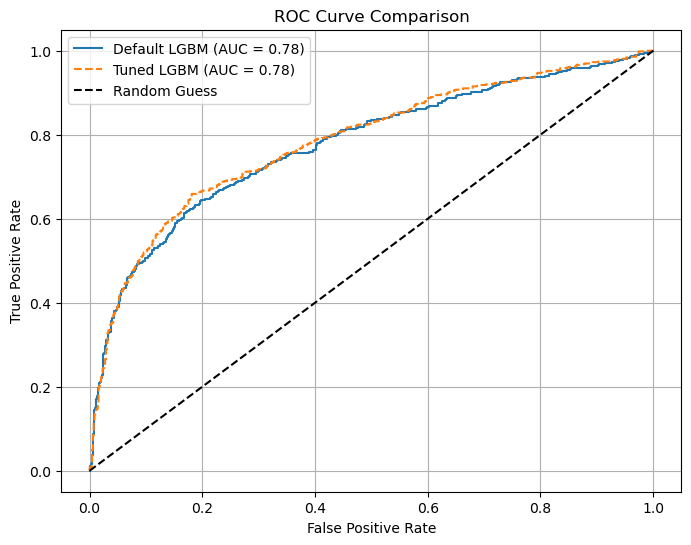

In [245]:
fpr_default, tpr_default, _ = roc_curve(y_test, y_pred_proba_default)
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_pred_proba_tuned)

plt.figure(figsize=(8, 6))
plt.plot(fpr_default, tpr_default, label=f"Default LGBM (AUC = {roc_auc_default:.2f})")
plt.plot(fpr_tuned, tpr_tuned, label=f"Tuned LGBM (AUC = {roc_auc_tuned:.2f})", linestyle='--')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='best')
plt.grid()
plt.show()

ROC AUC ngga munkin sama antara semua dan sebelum. make sure rumus ROC AUC

pakai PR curved untuk optimasi atau pakai probability threshold, dicoba satu2...LGBM pakai 0.5...pilih maksimum threshold aja kalau 

In [246]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default LGBM : \n', report_default)
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Default LGBM : 
               precision    recall  f1-score   support

           0       0.70      0.83      0.76       690
           1       0.77      0.61      0.68       625

    accuracy                           0.73      1315
   macro avg       0.73      0.72      0.72      1315
weighted avg       0.73      0.73      0.72      1315

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.70      0.87      0.77       690
           1       0.80      0.59      0.68       625

    accuracy                           0.73      1315
   macro avg       0.75      0.73      0.73      1315
weighted avg       0.75      0.73      0.73      1315



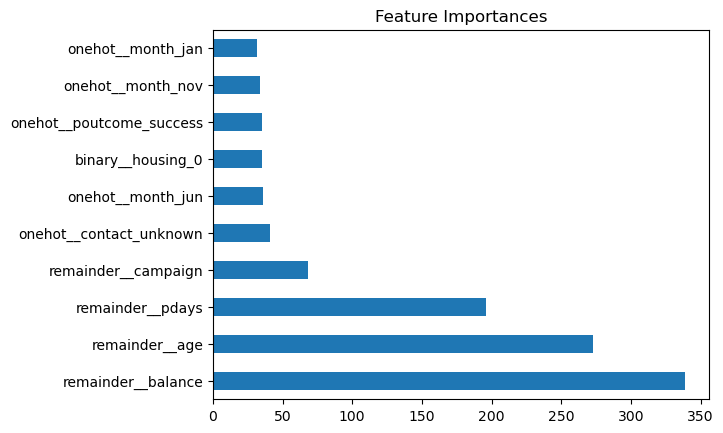

In [247]:
coef1 = pd.Series(best_model['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head(10)
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

This graph illustrates the feature importance for a model predicting outcomes of a bank campaign

- Most Important Features:
    - The feature remainder__balance is the most influential in the model, it means that account balance plays a significant role in predicting campaign success.
    - Other significant features include remainder__pdays (likely the number of days since the last contact in a previous campaign) and onehot__month_jun (indicating that campaigns conducted in June may have a higher predictive value).

- Moderately Important Features:
    - Features  remainder__age and onehot__month_nov have moderate importance, it means that factors like the age of the customer and campaigns run in November are moderately useful for predictions.

- Least Important Features:
    - Features such as binary__housing_0 (possibly indicating whether the customer has a housing loan) and onehot__month_aug (August campaign data) are less critical for the model's predictions.

- Possible Insights:
1. Campaign Timing :
    - Specific months in June, November have more importance, potentially indicating seasonality or effective timing for marketing efforts.
2. Account Balance 
    - Customers with a higher account balance may be more likely to respond positively
3. Past Campaign Interactions Are Relevant:
    - remainder__pdays indicates the significance of past interactions, suggesting that recent or frequent contact with the customer impacts campaign success.
4. Demographic or Financial Information (Age, Housing, Loan):
    - These factors play a smaller but non-negligible role, showing that customer demographics or financial commitments slightly influence campaign outcomes.

EDA apakah bener remainder balance mempengaruhi deposit...untuk validasi beneran ga ya ini mempengaruhi

SHAP value conclusionnya bgaimana? apakah semakin besar balance akan semakin deposit

In [248]:
print(x_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5257 entries, 4522 to 6116
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               5257 non-null   float64
 1   job               5257 non-null   object 
 2   balance           5257 non-null   float64
 3   housing           5257 non-null   object 
 4   loan              5257 non-null   object 
 5   contact           5257 non-null   object 
 6   month             5257 non-null   object 
 7   campaign          5257 non-null   float64
 8   pdays             5257 non-null   float64
 9   poutcome          5257 non-null   object 
 10  poutcome_encoded  5257 non-null   int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 492.8+ KB
None


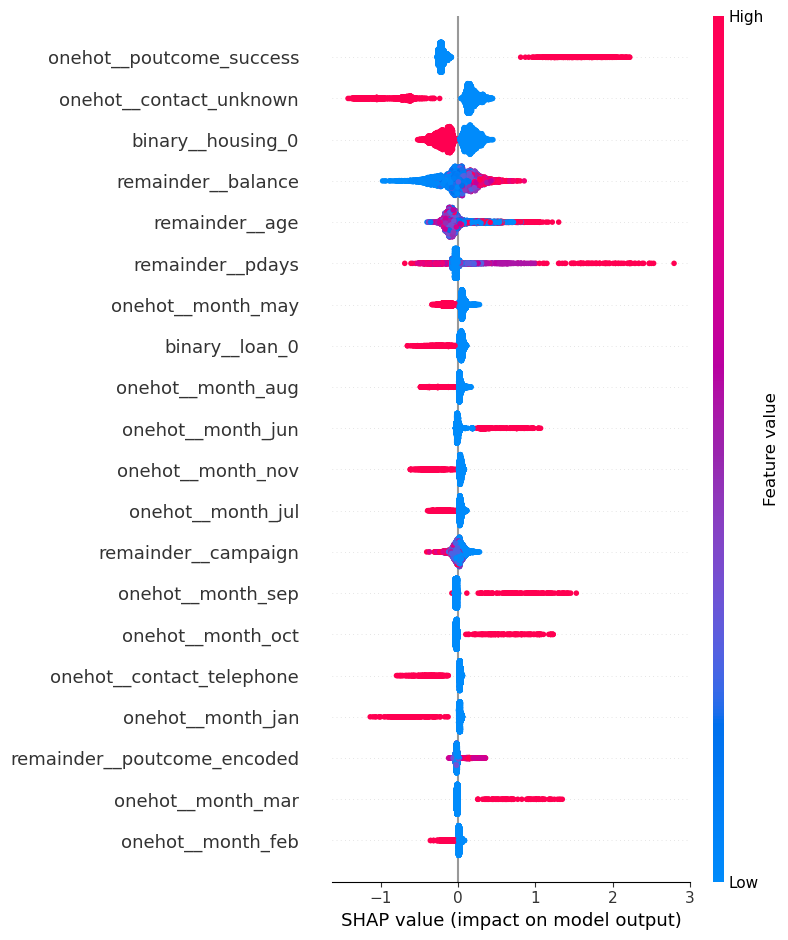

In [249]:

# Transform the training data using the transformer
x_train_transformed = transformer.fit_transform(x_train)
explainer = shap.TreeExplainer(best_model['model'], feature_perturbation="tree_path_dependent")

# Calculate SHAP values
shap_values = explainer.shap_values(x_train_transformed)
# Plot
shap.summary_plot(shap_values, x_train_transformed, feature_names=transformer.get_feature_names_out())





In [250]:
shap_values.shape

(5257, 36)

In [251]:
x_train.shape

(5257, 11)

### Permutation Importance

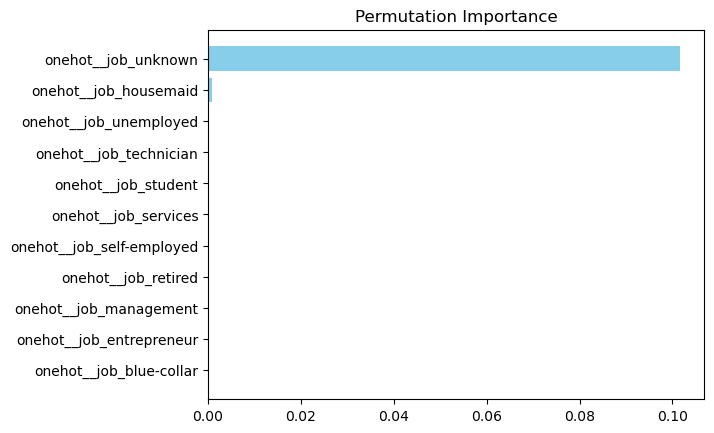

In [289]:
from sklearn.inspection import permutation_importance


perm_import = permutation_importance(best_model, x_test, y_test, random_state=42)
perm_sorted_idx = perm_import.importances_mean.argsort()

plt.barh(
    transformer.get_feature_names_out()[perm_sorted_idx],
    perm_import.importances_mean[perm_sorted_idx],
    color='skyblue'
)
plt.title('Permutation Importance')
plt.show()

---
check random search then grid search

In [252]:

# Define the hyperparameter space for RandomizedSearchCV (with a wider range)
param_dist = {
    'model__max_bin': np.arange(200, 301, 10),  # Explore wider range
    'model__num_leaves': np.arange(20, 100, 10),
    'model__min_data_in_leaf': np.arange(10, 50, 5),
    'model__num_iterations': [50, 75, 100, 125, 150],
    'model__learning_rate': [0.01, 0.05, 0.075, 0.1, 0.15],
    'model__random_state': [42]
}

# Create the pipeline
pipeline = Pipeline([
    ('preprocess', transformer),
    ('model', lgb.LGBMClassifier(verbosity=-1))
])

# RandomizedSearchCV to sample from the larger range of hyperparameters
random_search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_dist, 
    n_iter=50,  # number of random combinations to try
    scoring='precision', 
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
    n_jobs=-1, 
    random_state=42
)

# Fit the RandomizedSearchCV
random_search.fit(x_train, y_train)
# Get the best parameters from RandomizedSearchCV
best_random_params = random_search.best_params_
print("Best Parameters from RandomizedSearchCV:", best_random_params)


Best Parameters from RandomizedSearchCV: {'model__random_state': 42, 'model__num_leaves': 20, 'model__num_iterations': 150, 'model__min_data_in_leaf': 40, 'model__max_bin': 290, 'model__learning_rate': 0.01}


In [253]:

# Refine hyperparameter space around RandomizedSearchCV results
param_grid = {
    'model__max_bin': [best_random_params['model__max_bin'] - 2, best_random_params['model__max_bin'], best_random_params['model__max_bin'] + 2],
    'model__num_leaves': [best_random_params['model__num_leaves'] - 2, best_random_params['model__num_leaves'], best_random_params['model__num_leaves'] + 2],
    'model__min_data_in_leaf': [best_random_params['model__min_data_in_leaf'] - 2, best_random_params['model__min_data_in_leaf'], best_random_params['model__min_data_in_leaf'] + 2],
    'model__num_iterations': [best_random_params['model__num_iterations']],
    'model__learning_rate': [best_random_params['model__learning_rate']],
    'model__random_state': [42]
}

# GridSearchCV for fine-tuning
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    scoring='precision',  # Same evaluation metric
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(x_train, y_train)

# Get the best parameters from GridSearchCV
best_grid_params = grid_search.best_params_
print("Best Parameters from GridSearchCV:", best_grid_params)

Best Parameters from GridSearchCV: {'model__learning_rate': 0.01, 'model__max_bin': 292, 'model__min_data_in_leaf': 42, 'model__num_iterations': 150, 'model__num_leaves': 18, 'model__random_state': 42}


In [254]:
# Fit the best model from GridSearchCV
best_model_grid = grid_search.best_estimator_
best_model_grid.fit(x_train, y_train)

# Fit the default estimator (before tuning)
estimator_grid = Pipeline([
    ('preprocess', transformer),  # Transformer for preprocessing
    ('model', lgb.LGBMClassifier(verbosity=-1))  # Default LightGBM model
])
estimator_grid.fit(x_train, y_train)


# Predictions using both models
y_pred_default = estimator_grid.predict(x_test)  # Default model
y_pred_tuned_grid = best_model_grid.predict(x_test)   # Tuned model from GridSearchCV

# Calculate Precision for both models
precision_default = precision_score(y_test, y_pred_default, zero_division=0)
precision_tuned_grid = precision_score(y_test, y_pred_tuned, zero_division=0)

# Display Precision Scores
print('Precision Score Default LGBM : ', precision_default)
print('Precision Score Tuned LGBM : ', precision_tuned_grid)

# Print Best Parameters from RandomizedSearchCV and GridSearchCV
print("Best Parameters from RandomizedSearchCV: ", best_random_params)
print("Best Parameters from GridSearchCV: ", grid_search.best_params_)


Precision Score Default LGBM :  0.7672064777327935
Precision Score Tuned LGBM :  0.8008752735229759
Best Parameters from RandomizedSearchCV:  {'model__random_state': 42, 'model__num_leaves': 20, 'model__num_iterations': 150, 'model__min_data_in_leaf': 40, 'model__max_bin': 290, 'model__learning_rate': 0.01}
Best Parameters from GridSearchCV:  {'model__learning_rate': 0.01, 'model__max_bin': 292, 'model__min_data_in_leaf': 42, 'model__num_iterations': 150, 'model__num_leaves': 18, 'model__random_state': 42}


In [255]:
# Extract the 4 best parameter combinations
top_random_params = sorted(random_search.cv_results_['params'], 
                            key=lambda x: random_search.cv_results_['mean_test_score'][random_search.cv_results_['params'].index(x)], 
                            reverse=True)[:4]

In [256]:
print("Top 4 Parameters from RandomizedSearchCV:")
for i, params in enumerate(top_random_params, 1):
    print(f"{i}: {params}")

Top 4 Parameters from RandomizedSearchCV:
1: {'model__random_state': 42, 'model__num_leaves': 20, 'model__num_iterations': 150, 'model__min_data_in_leaf': 40, 'model__max_bin': 290, 'model__learning_rate': 0.01}
2: {'model__random_state': 42, 'model__num_leaves': 30, 'model__num_iterations': 150, 'model__min_data_in_leaf': 30, 'model__max_bin': 270, 'model__learning_rate': 0.01}
3: {'model__random_state': 42, 'model__num_leaves': 30, 'model__num_iterations': 75, 'model__min_data_in_leaf': 25, 'model__max_bin': 220, 'model__learning_rate': 0.01}
4: {'model__random_state': 42, 'model__num_leaves': 30, 'model__num_iterations': 125, 'model__min_data_in_leaf': 45, 'model__max_bin': 240, 'model__learning_rate': 0.01}


In [257]:
grid_param_space = {
    'model__max_bin': [params['model__max_bin'] for params in top_random_params],
    'model__num_leaves': [params['model__num_leaves'] for params in top_random_params],
    'model__min_data_in_leaf': [params['model__min_data_in_leaf'] for params in top_random_params],
    'model__learning_rate': [params['model__learning_rate'] for params in top_random_params],
    'model__num_iterations': [params['model__num_iterations'] for params in top_random_params],
    'model__random_state': [42]  # Keep random state fixed
}

In [258]:
grid_search_2= GridSearchCV(
    estimator=estimator,
    param_grid=grid_param_space,
    scoring='precision',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1
)

grid_search_2.fit(x_train, y_train)

# Best parameters and model
print("Best Parameters from GridSearchCV:", grid_search.best_params_)
best_model_2 = grid_search_2.best_estimator_

# Evaluate the tuned model
y_pred_tuned_2 = best_model_2.predict(x_test)
precision_tuned_2 = precision_score(y_test, y_pred_tuned_2)

print("Precision Score Tuned LGBM:", precision_tuned_2)

Best Parameters from GridSearchCV: {'model__learning_rate': 0.01, 'model__max_bin': 292, 'model__min_data_in_leaf': 42, 'model__num_iterations': 150, 'model__num_leaves': 18, 'model__random_state': 42}
Precision Score Tuned LGBM: 0.816793893129771


In [259]:
grid_search_2.best_score_

0.7906373770365335

In [306]:

y_pred_train_default = estimator.predict(x_train)
y_pred_train_tuned = best_model.predict(x_train)
y_pred_train_tuned_2 = best_model_2.predict(x_train)

precision_train_default = precision_score(y_train, y_pred_train_default)
precision_train_tuned = precision_score(y_train, y_pred_train_tuned)
precision_train_tuned_2 = precision_score(y_train, y_pred_train_tuned_2)


print('Precision Score (Train) Default LGBM:', precision_train_default)
print('Precision Score (Train) Tuned LGBM Random HyperParameter:', precision_train_tuned)
print('Precision Score (Train) Tuned LGBM Grid HyperParameter:', precision_train_tuned_2)

Precision Score (Train) Default LGBM: 0.7536534446764092
Precision Score (Train) Tuned LGBM Random HyperParameter: 0.7142857142857143
Precision Score (Train) Tuned LGBM Grid HyperParameter: 0.812910938433951


In [307]:
# Predictions
y_pred_default = estimator.predict(x_test)
y_pred_tuned = best_model.predict(x_test)
y_pred_tuned_2 = best_model_2.predict(x_test)

#  Precision
precision_default = precision_score(y_test, y_pred_default)
precision_tuned = precision_score(y_test, y_pred_tuned)
precision_tuned_2 = precision_score(y_test, y_pred_tuned_2)

# Display Precision Scores
print('Precision Score Default LGBM : ', precision_default)
print('Precision Score Tuned LGBM Random HyperParameter: ', precision_tuned)
print('Precision Score Tuned LGBM Randomized Search & Grid Searc : ', precision_tuned_2)



Precision Score Default LGBM :  0.7551440329218106
Precision Score Tuned LGBM Random HyperParameter:  0.7275985663082437
Precision Score Tuned LGBM Randomized Search & Grid Searc :  0.816793893129771


In [261]:
# Predict probabilities for default and tuned models
y_pred_proba_default = estimator.predict_proba(x_test)[:, 1]  # Default model
y_pred_proba_tuned = best_model.predict_proba(x_test)[:, 1]   # Tuned model
y_pred_proba_tuned2 = best_model_2.predict_proba(x_test)[:, 1]   # Tuned model

#  ROC AUC scores
roc_auc_default = roc_auc_score(y_test, y_pred_proba_default)
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)
roc_auc_tuned_2 = roc_auc_score(y_test, y_pred_proba_tuned2)

#  ROC AUC scores
print('ROC AUC Score (Default LGBM):', roc_auc_default)
print('ROC AUC Score (Tuned LGBM):', roc_auc_tuned)
print('ROC AUC Score (Tuned 2 LGBM):', roc_auc_tuned_2)

ROC AUC Score (Default LGBM): 0.775686956521739
ROC AUC Score (Tuned LGBM): 0.783743768115942
ROC AUC Score (Tuned 2 LGBM): 0.7858353623188407


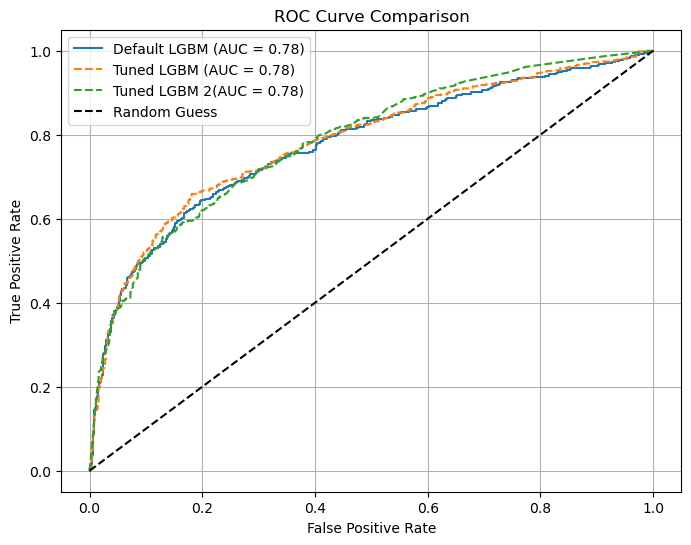

In [262]:
fpr_default, tpr_default, _ = roc_curve(y_test, y_pred_proba_default)
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_pred_proba_tuned)
fpr_tuned_2, tpr_tuned_2, _ = roc_curve(y_test, y_pred_proba_tuned2)

plt.figure(figsize=(8, 6))
plt.plot(fpr_default, tpr_default, label=f"Default LGBM (AUC = {roc_auc_default:.2f})")
plt.plot(fpr_tuned, tpr_tuned, label=f"Tuned LGBM (AUC = {roc_auc_tuned:.2f})", linestyle='--')
plt.plot(fpr_tuned_2, tpr_tuned_2, label=f"Tuned LGBM 2(AUC = {roc_auc_tuned:.2f})", linestyle='--')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='best')
plt.grid()
plt.show()

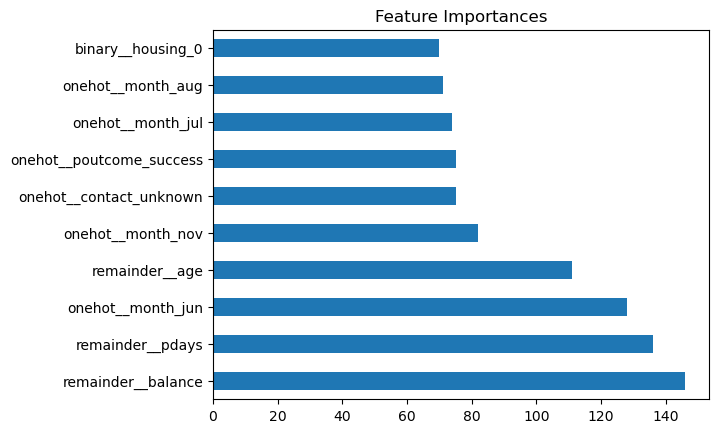

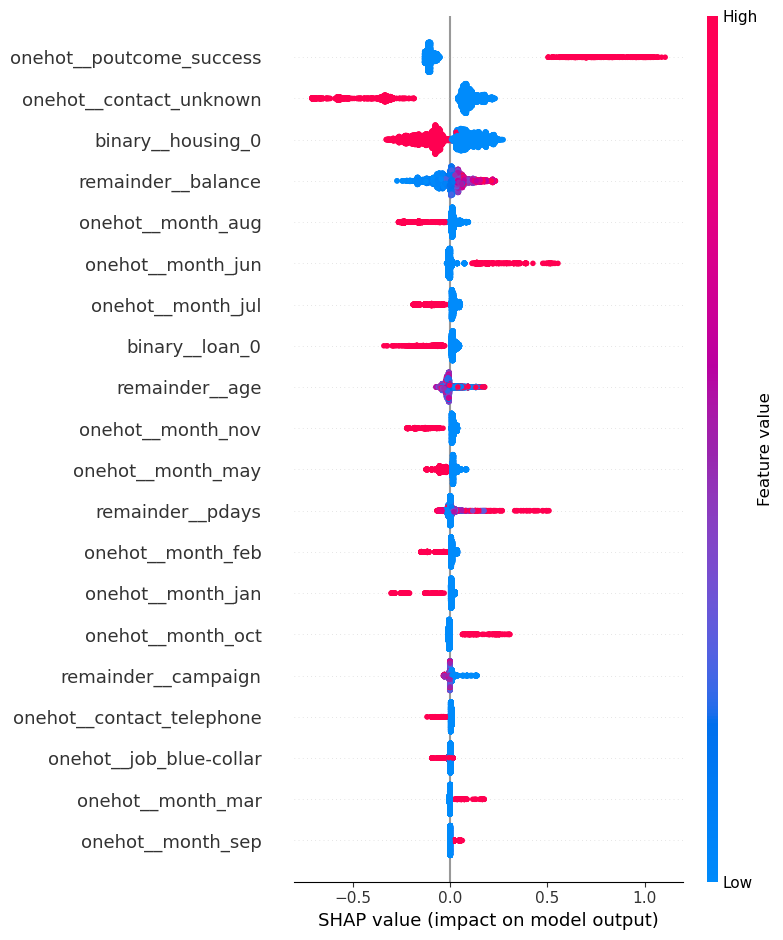

In [ ]:
coef1 = pd.Series(best_model_2['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head(10)
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

x_train_transformed = transformer.fit_transform(x_train)
explainer = shap.TreeExplainer(best_model_2['model'], feature_perturbation="tree_path_dependent")


shap_values = explainer.shap_values(x_train_transformed)

shap.summary_plot(shap_values, x_train_transformed, feature_names=transformer.get_feature_names_out())

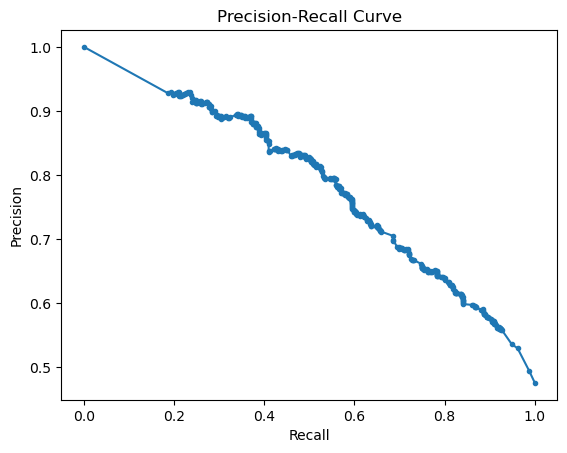

In [300]:

from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_tuned2)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()



In [301]:
df_pr_curve = pd.DataFrame({
    'precision': precision,
    'recall': recall,
    'thresholds': list(thresholds) + [0]
}).sort_values('precision', ascending=False)

df_pr_curve.head()

,precision,recall,thresholds
441,1.000000,0.0000,0.000000
421,0.930380,0.2352,0.666275
439,0.930233,0.1920,0.700789
433,0.929577,0.2112,0.676724
434,0.929078,0.2096,0.681697


''

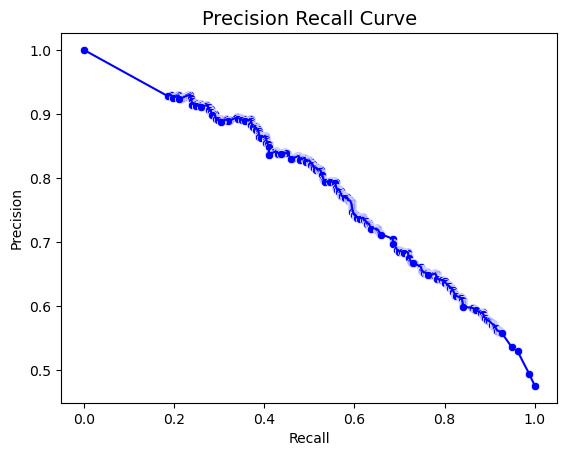

In [304]:
sns.lineplot(data=df_pr_curve, x='recall', y='precision', color='b')
sns.scatterplot(data=df_pr_curve, x='recall', y='precision', color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve', size=14)
;

In [ ]:
#desired_precision = 0.75
#optimal_threshold = thresholds[np.argmax(precision >= desired_precision)]  # Choose threshold for precision >= 0.75
#print("Optimal Threshold for Precision >= 0.75:", optimal_threshold)


#y_pred_adjusted = (y_pred_proba_tuned2 >= optimal_threshold).astype(int)

#precision_adjusted = precision_score(y_test, y_pred_adjusted)
#recall_adjusted = recall_score(y_test, y_pred_adjusted)
#f1_adjusted = f1_score(y_test, y_pred_adjusted)

#print(f"Precision: {precision_adjusted}")
#print(f"Recall: {recall_adjusted}")
#print(f"F1 Score: {f1_adjusted}")


Optimal Threshold for Precision >= 0.75: 0.4590357300057219
Precision: 0.75
Recall: 0.5952
F1 Score: 0.6636931311329171


---
### Hyper parameter tuning for Logistic regression

1. Penalty Options:
- l1: Lasso regularization (feature selection).
- l2: Ridge regularization (default).
- elasticnet: Mix of l1 and l2 (requires l1_ratio).

2. Solver Compatibility:
- liblinear: Works with l1 and l2.
- saga: Supports elasticnet.

3. Precision Score:
- The scoring metric precision ensures the model prioritizes reducing false positives.

In [ ]:

estimator = Pipeline([
    ('preprocess', transformer),
    ('model', logreg)
])

random_param_space = {
    'model__C': np.logspace(-4, 4, 50),  # Regularization strength
    'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'model__solver': ['liblinear', 'saga'],  # Suitable for l1 and elasticnet
    'model__max_iter': [100, 200, 500, 1000],  # Convergence iterations
}


random_search = RandomizedSearchCV(
    estimator=estimator,
    param_distributions=random_param_space,
    n_iter=100,  
    scoring='precision',
    #cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    cv= 5,
    n_jobs=-1,
    random_state=42
)

random_search.fit(x_train, y_train)


print("Best Parameters from RandomizedSearchCV:", random_search.best_params_)
best_model_random = random_search.best_estimator_
y_pred_tuned_random = best_model_random.predict(x_test)
precision_tuned_random = precision_score(y_test, y_pred_tuned_random)
print("Precision Score Tuned Logistic Regression:", precision_tuned_random)



Best Parameters from RandomizedSearchCV: {'model__solver': 'saga', 'model__penalty': 'l1', 'model__max_iter': 100, 'model__C': 0.0029470517025518097}
Precision Score Tuned Logistic Regression: 0.7275985663082437


In [ ]:
grid_param_space = {
    'model__C': [random_search.best_params_['model__C'] #* 0.5, 
                 #random_search.best_params_['model__C'], random_search.best_params_['model__C'] * 2
                 ],
    'model__penalty': [random_search.best_params_['model__penalty']],
    'model__solver': [random_search.best_params_['model__solver']],
    'model__max_iter': [random_search.best_params_['model__max_iter']],
}


grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=grid_param_space,
    scoring='precision',
    #cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    cv = 5,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)


best_model = grid_search.best_estimator_


y_pred_tuned = best_model.predict(x_test)


precision_tuned = precision_score(y_test, y_pred_tuned)

print("Best Parameters from GridSearchCV:", grid_search.best_params_)
print("Precision Score Tuned Logistic Regression:", precision_tuned)

Best Parameters from GridSearchCV: {'model__C': 0.0029470517025518097, 'model__max_iter': 100, 'model__penalty': 'l1', 'model__solver': 'saga'}
Precision Score Tuned Logistic Regression: 0.7275985663082437


---
# Hyperparameter tuning for voting



In [ ]:

logreg_vote_tune = LogisticRegression(random_state=42)
rf_vote_tune = RandomForestClassifier(random_state=42)
lgbm_vote_tune = lgb.LGBMClassifier(random_state=42)


voting_clf = VotingClassifier(
    estimators=[
        ('logreg_vote', logreg_vote_tune),
        ('rf_vote', rf_vote_tune),
        ('lgbm_vote', lgbm_vote_tune)
    ],
    voting='soft'
)

voting_pipeline = Pipeline([
    ('preprocessing', transformer),
    ('model', voting_clf)
])

param_distributions = {
    'model__logreg_vote__C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'model__logreg_vote__penalty': ['l1', 'l2'],
    'model__logreg_vote__solver': ['saga', 'liblinear'],
    'model__rf_vote__n_estimators': [50, 100, 200, 500],
    'model__rf_vote__max_depth': [5, 10, 20, None],
    'model__rf_vote__min_samples_split': [2, 5, 10],
    'model__lgbm_vote__num_leaves': [10, 20, 30, 50],
    'model__lgbm_vote__learning_rate': [0.001, 0.01, 0.1, 0.2],
    'model__lgbm_vote__num_iterations': [50, 100, 150, 200],
}

random_search = RandomizedSearchCV(
    estimator=voting_pipeline,
    param_distributions=param_distributions,
    n_iter=20,
    cv=3,
    scoring='precision',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(x_train, y_train)


best_params = random_search.best_params_
print("Best Parameters from Randomized Search:", best_params)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters from Randomized Search: {'model__rf_vote__n_estimators': 100, 'model__rf_vote__min_samples_split': 2, 'model__rf_vote__max_depth': 5, 'model__logreg_vote__solver': 'saga', 'model__logreg_vote__penalty': 'l1', 'model__logreg_vote__C': 1, 'model__lgbm_vote__num_leaves': 10, 'model__lgbm_vote__num_iterations': 50, 'model__lgbm_vote__learning_rate': 0.001}


In [ ]:

best_params = random_search.best_params_


grid_search_params = {
    'model__logreg_vote__C': [
        best_params['model__logreg_vote__C'] * 0.5,
        best_params['model__logreg_vote__C'],
        best_params['model__logreg_vote__C'] * 1.5
    ],
    'model__rf_vote__max_depth': [
        max(5, best_params['model__rf_vote__max_depth'] - 5),  # Ensure depth stays >= 5
        best_params['model__rf_vote__max_depth'],
        best_params['model__rf_vote__max_depth'] + 5
    ],
    'model__lgbm_vote__num_iterations': [
        max(50, best_params['model__lgbm_vote__num_iterations'] - 50),  # Ensure iterations >= 50
        best_params['model__lgbm_vote__num_iterations'],
        best_params['model__lgbm_vote__num_iterations'] + 50
    ]
}

print("Refined Grid Search Parameters:", grid_search_params)

grid_search = GridSearchCV(
    estimator=voting_pipeline,
    param_grid=grid_search_params,
    cv=3,
    scoring='precision',
    verbose=2,
    n_jobs=-1
)


grid_search.fit(x_train, y_train)

final_model = grid_search.best_estimator_


train_predictions = final_model.predict(x_train)
test_predictions = final_model.predict(x_test)

train_precision = precision_score(y_train, train_predictions)
test_precision = precision_score(y_test, test_predictions)


print("Final Model Parameters:", grid_search.best_params_)
print("Train Precision:", train_precision)
print("Test Precision:", test_precision)


Refined Grid Search Parameters: {'model__logreg_vote__C': [0.5, 1, 1.5], 'model__rf_vote__max_depth': [5, 5, 10], 'model__lgbm_vote__num_iterations': [50, 50, 100]}
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Final Model Parameters: {'model__lgbm_vote__num_iterations': 50, 'model__logreg_vote__C': 1.5, 'model__rf_vote__max_depth': 5}
Train Precision: 0.8191200434546442
Test Precision: 0.7946428571428571


In [268]:
train_recall = recall_score(y_train, train_predictions)
print("Test Recall:", train_recall)

Test Recall: 0.6036829463570856


In [ ]:


train_recall = recall_score(y_train, train_predictions)
test_recall = recall_score(y_test, test_predictions)

train_f1 = f1_score(y_train, train_predictions)
test_f1 = f1_score(y_test, test_predictions)

 
train_roc_auc = roc_auc_score(y_train, final_model.predict_proba(x_train)[:, 1])
test_roc_auc = roc_auc_score(y_test, final_model.predict_proba(x_test)[:, 1])


train_conf_matrix = confusion_matrix(y_train, train_predictions)
test_conf_matrix = confusion_matrix(y_test, test_predictions)


print("Train Recall:", train_recall)
print("Test Recall:", test_recall)
print("Train F1-score:", train_f1)
print("Test F1-score:", test_f1)
print("Train AUC-ROC:", train_roc_auc)
print("Test AUC-ROC:", test_roc_auc)

print("Train Confusion Matrix:\n", train_conf_matrix)
print("Test Confusion Matrix:\n", test_conf_matrix)


Train Recall: 0.6036829463570856
Test Recall: 0.5696
Train F1-score: 0.6950910348006453
Test F1-score: 0.6635601118359739
Train AUC-ROC: 0.8173323000553396
Test AUC-ROC: 0.7903466666666668
Train Confusion Matrix:
 [[2426  333]
 [ 990 1508]]
Test Confusion Matrix:
 [[598  92]
 [269 356]]


In [270]:
misclassified_train = x_train[train_predictions != y_train]
misclassified_test = x_test[test_predictions != y_test]

print("Misclassified Training Instances:\n", misclassified_train)
print("Misclassified Test Instances:\n", misclassified_test)

Misclassified Training Instances:
            age          job   balance housing loan   contact month  campaign  \
464  -0.310698    housemaid -0.342054     yes   no  cellular   may  0.759263   
5419 -0.856540   management -0.435630      no   no  cellular   feb  3.120032   
1233 -0.674593  blue-collar -0.418339     yes   no   unknown   may -0.027660   
4017  1.417804      retired -0.654312      no  yes  cellular   jul -0.814582   
1870 -1.129462       admin.  1.514201     yes   no  cellular   may -0.814582   
...        ...          ...       ...     ...  ...       ...   ...       ...   
6405  0.508066   technician  0.561154      no   no  cellular   aug  2.333109   
3876 -0.947514   management  0.778819     yes   no  cellular   aug  1.546186   
3222 -0.492645   technician -0.099978      no   no  cellular   apr -0.814582   
594  -0.856540       admin. -0.113201      no   no  cellular   may  1.546186   
4603 -0.674593   technician  2.296371      no  yes  cellular   aug -0.027660   

    

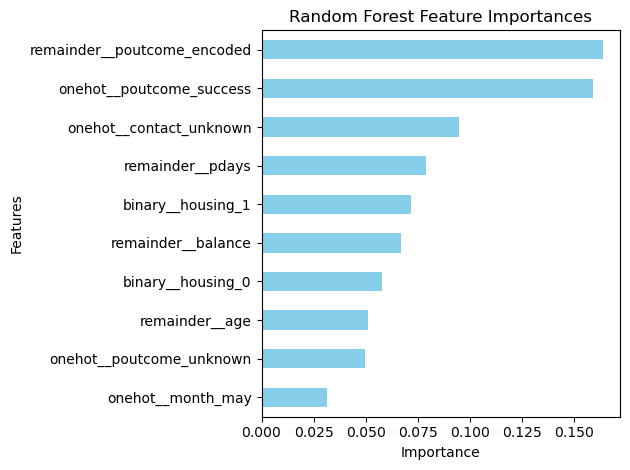

In [ ]:

if hasattr(final_model.named_steps['model'].named_estimators_['rf_vote'], 'feature_importances_'):
    rf_importances = final_model.named_steps['model'].named_estimators_['rf_vote'].feature_importances_
    feature_names = transformer.get_feature_names_out()  # Extract feature names from the transformer
    rf_importances_series = pd.Series(rf_importances, index=feature_names).sort_values(ascending=False)
    

    rf_importances_series.head(10).plot(kind='barh', title='Random Forest Feature Importances', color='skyblue')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.gca().invert_yaxis()  # 
    plt.tight_layout()
    plt.show()


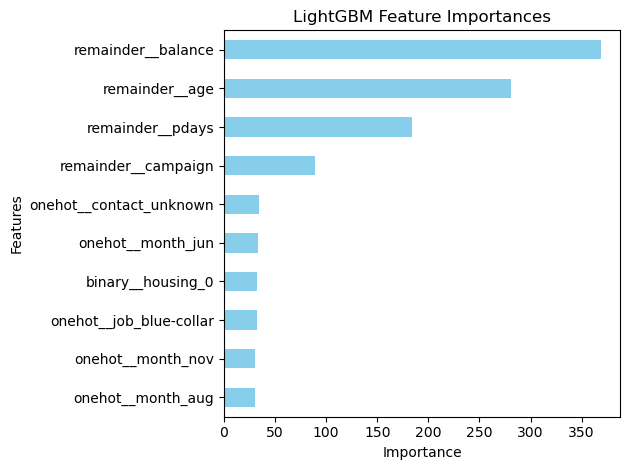

In [ ]:

if hasattr(final_model.named_steps['model'].named_estimators_['lgbm_vote'], 'feature_importances_'):
    lgbm_importances = final_model.named_steps['model'].named_estimators_['lgbm_vote'].feature_importances_
    feature_names = transformer.get_feature_names_out()  
    lgbm_importances_series = pd.Series(lgbm_importances, index=feature_names).sort_values(ascending=False)
    
    lgbm_importances_series.head(10).plot(kind='barh', title='LightGBM Feature Importances', color='skyblue')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.gca().invert_yaxis()  #
    plt.tight_layout()
    plt.show()

calculate how much can be saved by optimizing the marketing campaign based on the precision and targeting customers more effectively

1. Assumptions:
- Customer Acquisition Cost (CAC): $561 (cost to acquire one customer) source : https://firstpagesage.com/seo-blog/average-customer-acquisition-cost-cac-in-banking/
- Precision: From the results, the test precision is 0.795, which means 79.5% of the customers predicted by the model as "likely to subscribe" actually do subscribe.
- Conversion Rate: Let's assume that the conversion rate of customers targeted using the model will improve to the precision rate (79.5%).
- Total Number of Customers: Assume we have a list of 10,000 potential customers to target for the campaign.

2. Detail Savng Calculation
- Potential target customer : 10,000
- Defined Number of Customers Likely to Subscribe
    - Since we want to focus on customers who are likely to subscribe based on the model’s precision (79.5%), we can calculate how many customers from the total 10,000 will be identified as likely to subscribe.
    - Likely to Subscribe = 10,000× 0.795 =7,950
    - By using the model we can identify 7,950 customers are identified as likely to subscribe.

3. CaC Customers
    - To acquire these 7,950 customers, the marketing campaign will need to spend:
    - Total Acquisition Cost = 7,950×561= 4,458,450 USD

4. CaC for 10,000 Customers (Without Optimization)
    - If the campaign were to target all 10,000 customers without optimizing based on the model’s precision, the total acquisition cost would be:
    - Total Acquisition Cost (No Optimization)=10,000×561=5,610,000 USD

4. Savings from Optimizing the Campaign
    - By using the model to target only the 7,950 likely subscribers instead of all 10,000 customers, we can save the difference between the two acquisition costs:
    - Savings=5,610,000−4,458,450=1,151,550 USD

5. Conclusion:
    - By focusing the campaign on customers predicted by the model as likely to subscribe, the bank can save $1,151,550 in CAC, which makes the campaign more efficient and cost-effective.